In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
df.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [4]:
df.shape

(1017209, 9)

In [5]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [9]:
## df=df.sort_index()

In [10]:
# df.head()

In [11]:
# df.set_index('Date', inplace=True)

In [12]:
#df.head()

In [13]:
atr=df[df['Store']==682]

In [14]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
681        682          5 2015-07-31  13979       2013     1      1   
1796       682          4 2015-07-30  13026       1837     1      1   
2911       682          3 2015-07-29  12320       1828     1      1   
4026       682          2 2015-07-28  13595       1876     1      1   
5141       682          1 2015-07-27  14722       1990     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012316    682          6 2013-01-05   7593       1304     1      0   
1013431    682          5 2013-01-04  11376       1855     1      0   
1014546    682          4 2013-01-03  11041       1839     1      0   
1015661    682          3 2013-01-02  10526       1742     1      0   
1016776    682          2 2013-01-01   3375        566     1      0   

        StateHoliday  SchoolHoliday  
681                0              1  
1796               0              1  
2911               0              1  
4026               0              1  
5141               0              1  
...              ...            ...  
1012316            0              0  
1013431            0              1  
1014546            0              1  
1015661            0              1  
1016776            a              1  

[942 rows x 9 columns]

In [15]:
atr.Sales.value_counts()

11447    3
11231    3
10162    2
8346     2
13715    2
        ..
12351    1
11103    1
12311    1
13042    1
3375     1
Name: Sales, Length: 903, dtype: int64

In [16]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
681        682          5 2015-07-31  13979       2013     1      1   
1796       682          4 2015-07-30  13026       1837     1      1   
2911       682          3 2015-07-29  12320       1828     1      1   
4026       682          2 2015-07-28  13595       1876     1      1   
5141       682          1 2015-07-27  14722       1990     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012316    682          6 2013-01-05   7593       1304     1      0   
1013431    682          5 2013-01-04  11376       1855     1      0   
1014546    682          4 2013-01-03  11041       1839     1      0   
1015661    682          3 2013-01-02  10526       1742     1      0   
1016776    682          2 2013-01-01   3375        566     1      0   

        StateHoliday  SchoolHoliday  
681                0              1  
1796               0              1  
2911               0              1  
4026               0              1  
5141               0              1  
...              ...            ...  
1012316            0              0  
1013431            0              1  
1014546            0              1  
1015661            0              1  
1016776            a              1  

[942 rows x 9 columns]

In [17]:
atr=atr.sort_index()

In [18]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
681        682          5 2015-07-31  13979       2013     1      1   
1796       682          4 2015-07-30  13026       1837     1      1   
2911       682          3 2015-07-29  12320       1828     1      1   
4026       682          2 2015-07-28  13595       1876     1      1   
5141       682          1 2015-07-27  14722       1990     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012316    682          6 2013-01-05   7593       1304     1      0   
1013431    682          5 2013-01-04  11376       1855     1      0   
1014546    682          4 2013-01-03  11041       1839     1      0   
1015661    682          3 2013-01-02  10526       1742     1      0   
1016776    682          2 2013-01-01   3375        566     1      0   

        StateHoliday  SchoolHoliday  
681                0              1  
1796               0              1  
2911               0              1  
4026               0              1  
5141               0              1  
...              ...            ...  
1012316            0              0  
1013431            0              1  
1014546            0              1  
1015661            0              1  
1016776            a              1  

[942 rows x 9 columns]

In [19]:
atr=atr.set_index('Date')

In [20]:
atr.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [21]:
atr.tail()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2013-01-05    682          6   7593       1304     1      0            0   
2013-01-04    682          5  11376       1855     1      0            0   
2013-01-03    682          4  11041       1839     1      0            0   
2013-01-02    682          3  10526       1742     1      0            0   
2013-01-01    682          2   3375        566     1      0            a   

            SchoolHoliday  
Date                       
2013-01-05              0  
2013-01-04              1  
2013-01-03              1  
2013-01-02              1  
2013-01-01              1

In [22]:
data=atr.copy()

In [23]:
data1=atr.copy()

In [24]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [25]:
data.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

Text(0, 0.5, 'Daily Sales of store 682')

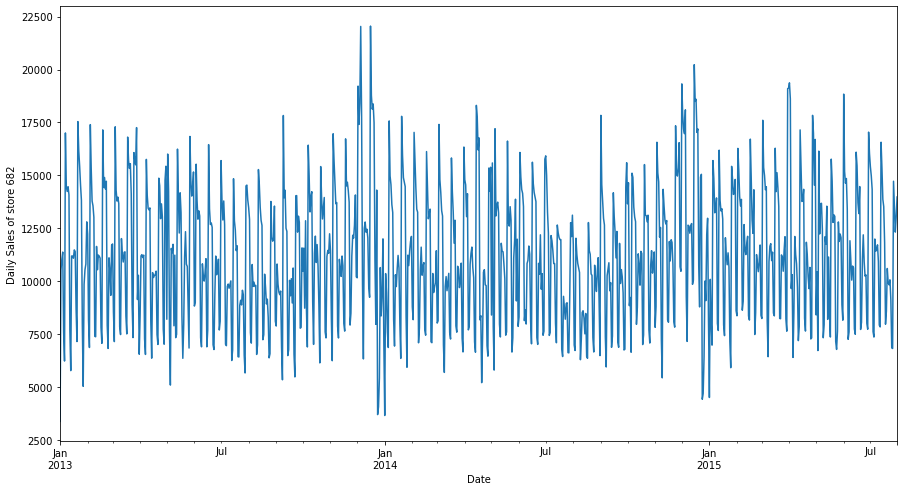

In [26]:
plt.figure(figsize=(15,8))
data['Sales'].plot()
plt.ylabel('Daily Sales of store 682')

In [27]:
data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [28]:
data=data.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'], axis=1)

In [29]:
data

Sales
Date             
2015-07-31  13979
2015-07-30  13026
2015-07-29  12320
2015-07-28  13595
2015-07-27  14722
...           ...
2013-01-05   7593
2013-01-04  11376
2013-01-03  11041
2013-01-02  10526
2013-01-01   3375

[942 rows x 1 columns]

In [30]:
atr.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [31]:
atr.Sales.describe()

count      942.000000
mean     11207.408705
std       3253.524235
min       3375.000000
25%       8252.000000
50%      11113.500000
75%      13646.000000
max      22052.000000
Name: Sales, dtype: float64

In [32]:
data2=data['Sales']
data2.head()

Date
2015-07-31    13979
2015-07-30    13026
2015-07-29    12320
2015-07-28    13595
2015-07-27    14722
Name: Sales, dtype: int64

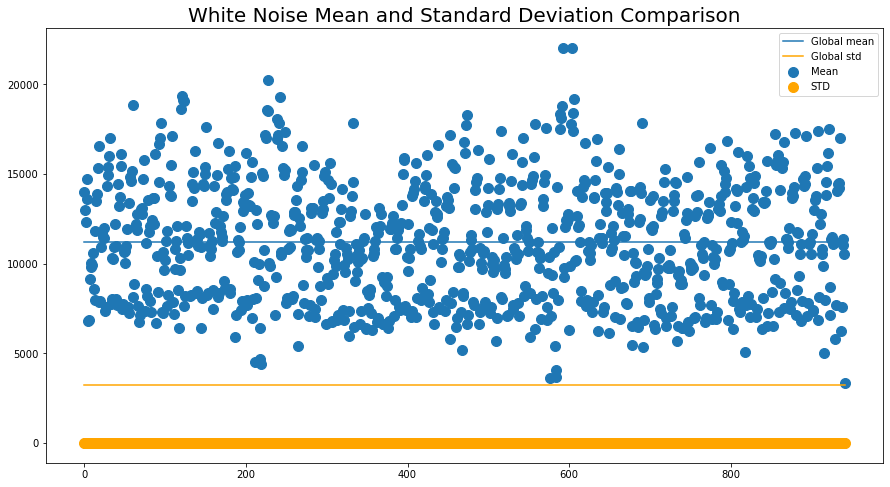

In [33]:
# Split into an arbitraty number of chunks
white_noise_chunks = data2
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.figure(figsize=(15,8))
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [data2.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [data2.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

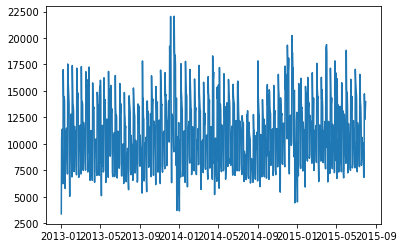

In [34]:
plt.plot(data2)

***Resampling data on weekly basis***

In [35]:
data2.resample('W').sum()

Date
2013-01-06    50139
2013-01-13    87727
2013-01-20    72190
2013-01-27    90527
2013-02-03    71253
              ...  
2015-07-05    92755
2015-07-12    73305
2015-07-19    87675
2015-07-26    63208
2015-08-02    67642
Freq: W-SUN, Name: Sales, Length: 135, dtype: int64

<AxesSubplot:xlabel='Date'>

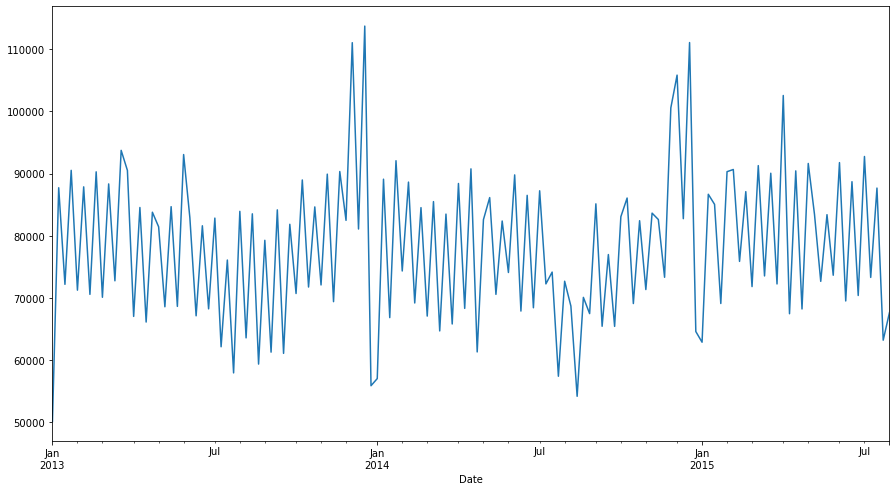

In [36]:
plt.figure(figsize=(15,8))
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

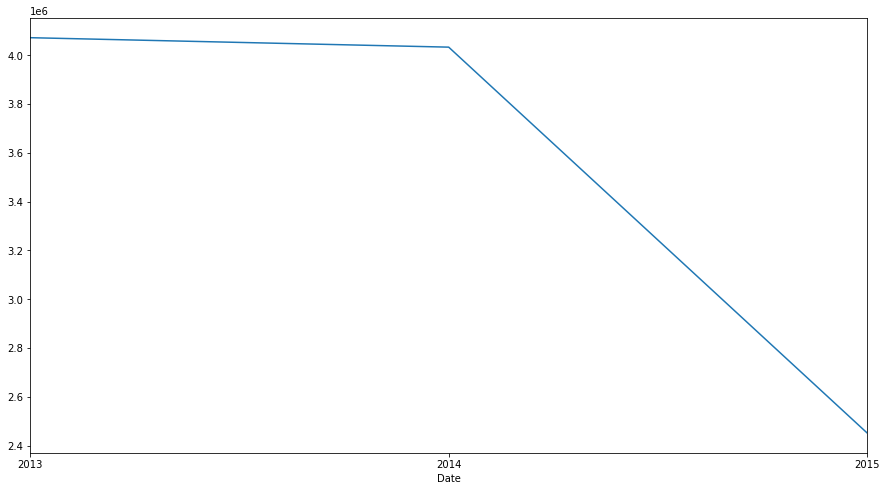

In [37]:
plt.figure(figsize=(15,8))
data2.resample('Y').sum().plot()  

<AxesSubplot:xlabel='Date'>

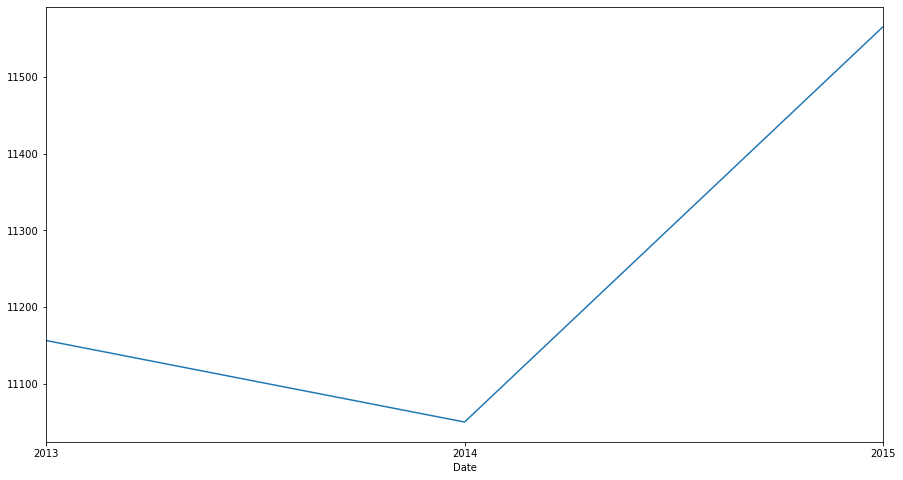

In [38]:
plt.figure(figsize=(15,8))
data2.resample('Y').mean().plot()

In [39]:
data2.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [40]:
data2.index.dayofweek

Int64Index([4, 3, 2, 1, 0, 6, 5, 4, 3, 2,
            ...
            3, 2, 1, 0, 6, 5, 4, 3, 2, 1],
           dtype='int64', name='Date', length=942)

In [41]:
data1.groupby(data2.index.dayofweek)['Sales'].mean()

Date
0    13756.731343
1    12844.481481
2    12295.822222
3    12222.259259
4    12107.392593
5     7920.619403
6     7269.925373
Name: Sales, dtype: float64

In [42]:
weekday=data1.groupby(data2.index.dayofweek)['Sales'].mean()
weekday

Date
0    13756.731343
1    12844.481481
2    12295.822222
3    12222.259259
4    12107.392593
5     7920.619403
6     7269.925373
Name: Sales, dtype: float64

In [43]:
weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

In [44]:
weekday

Mon     13756.731343
Tue     12844.481481
Wed     12295.822222
Thur    12222.259259
Fri     12107.392593
Sat      7920.619403
Sun      7269.925373
Name: Sales, dtype: float64

<AxesSubplot:>

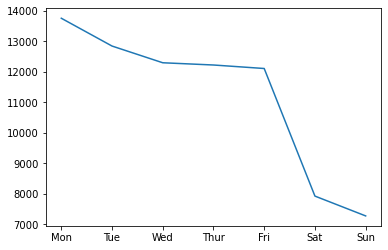

In [45]:
weekday.plot()

In [46]:
data2.index.dayofyear   

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [47]:
days=data2.index.dayofyear 
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [48]:
data1.groupby(days)['Sales'].mean()

Date
1       3845.333333
2      10324.000000
3       9514.000000
4       8651.333333
5      10053.000000
           ...     
361    10325.500000
362     8721.000000
363    10795.500000
364    12486.500000
365     7593.500000
Name: Sales, Length: 365, dtype: float64

Text(0, 0.5, 'Avg sales')

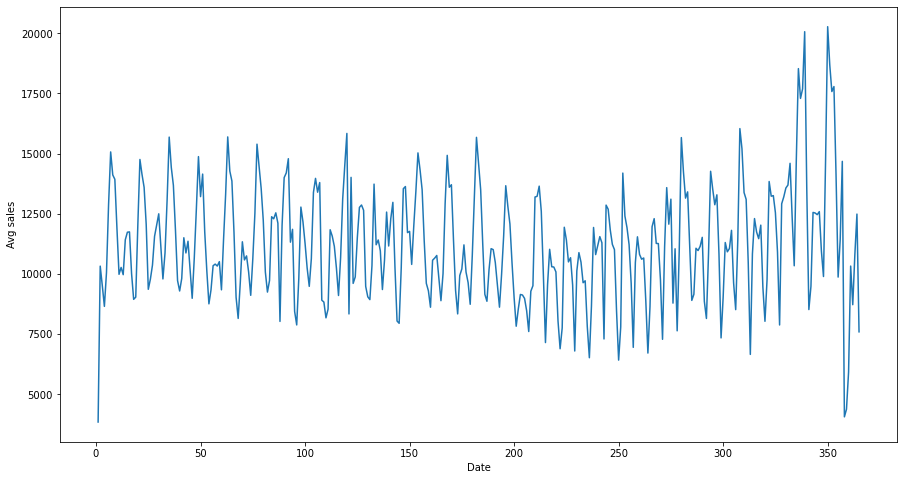

In [49]:
plt.figure(figsize=(15,8))
data1.groupby(days)['Sales'].mean().plot()
plt.ylabel('Avg sales')

In [50]:
data2.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=942)

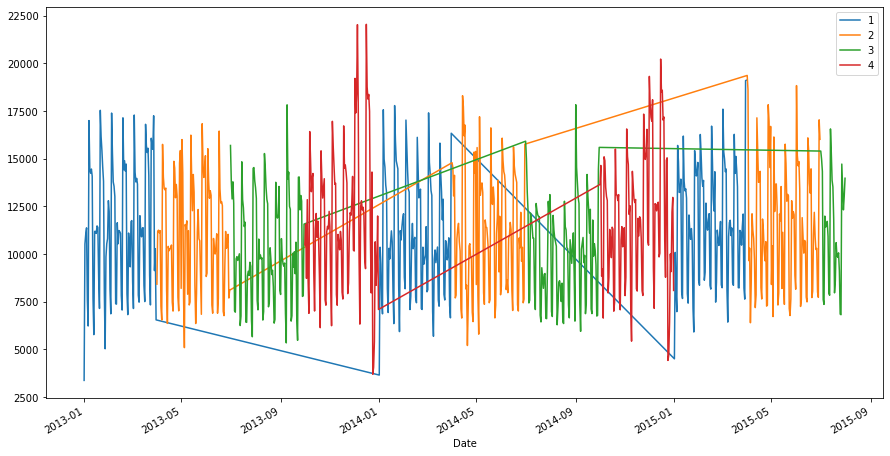

In [51]:
plt.figure(figsize=(15,8))
data.groupby(data2.index.quarter)['Sales'].plot()
plt.legend()

In [52]:
#  trend of Sales on weekdays vs weekends 

In [53]:
data1['dayofweek']=data1.index.dayofweek

In [54]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday  dayofweek  
Date                                  
2015-07-31              1          4  
2015-07-30              1          3  
2015-07-29              1          2  
2015-07-28              1          1  
2015-07-27              1          0

In [55]:
def assign_label(features):
    if features<5:
        return 'weekday'
    else:
        return 'weekend'

In [56]:
data1['dayofweek']=data1['dayofweek'].apply(assign_label)

In [57]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday dayofweek  
Date                                 
2015-07-31              1   weekday  
2015-07-30              1   weekday  
2015-07-29              1   weekday  
2015-07-28              1   weekday  
2015-07-27              1   weekday

<AxesSubplot:title={'center':'Weekend Sales'}, xlabel='Date'>

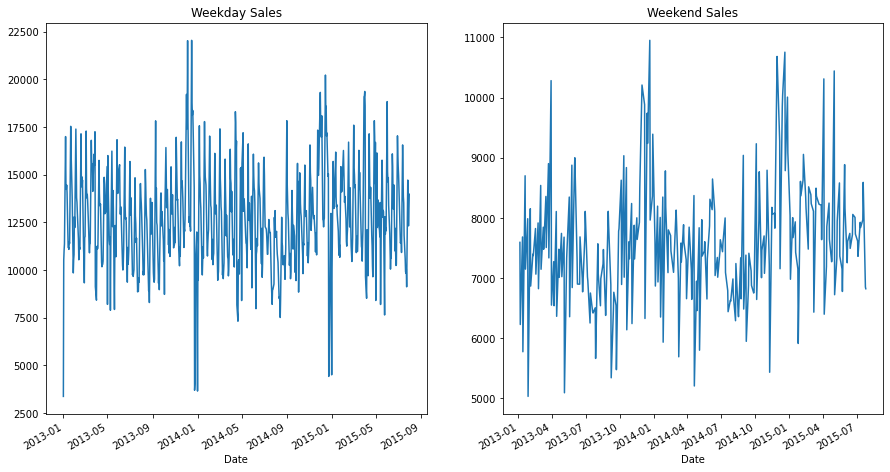

In [58]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
data1[data1['dayofweek']=='weekday']['Sales'].plot(ax=ax[0], title='Weekday Sales')
data1[data1['dayofweek']=='weekend']['Sales'].plot(ax=ax[1], title='Weekend Sales')

***naive model***

In [59]:
data1['Sales'].shift(1)

Date
2015-07-31        NaN
2015-07-30    13979.0
2015-07-29    13026.0
2015-07-28    12320.0
2015-07-27    13595.0
               ...   
2013-01-05     6228.0
2013-01-04     7593.0
2013-01-03    11376.0
2013-01-02    11041.0
2013-01-01    10526.0
Name: Sales, Length: 942, dtype: float64

In [60]:
data1['prediction_naive']=data1['Sales'].shift(1)

In [61]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    682          5  13979       2013     1      1            0   
2015-07-30    682          4  13026       1837     1      1            0   
2015-07-29    682          3  12320       1828     1      1            0   
2015-07-28    682          2  13595       1876     1      1            0   
2015-07-27    682          1  14722       1990     1      1            0   

            SchoolHoliday dayofweek  prediction_naive  
Date                                                   
2015-07-31              1   weekday               NaN  
2015-07-30              1   weekday           13979.0  
2015-07-29              1   weekday           13026.0  
2015-07-28              1   weekday           12320.0  
2015-07-27              1   weekday           13595.0

<AxesSubplot:xlabel='Date'>

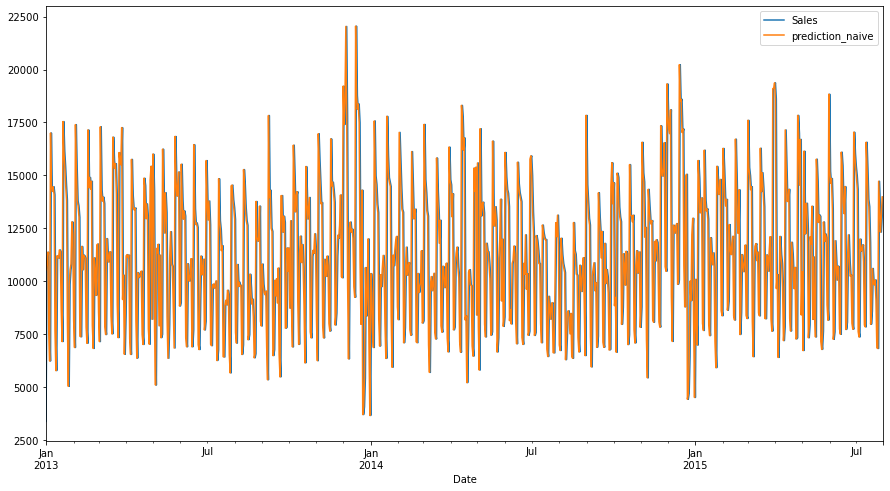

In [62]:
data1[['Sales','prediction_naive']].plot(figsize=(15,8))

In [63]:
# No much change , predicted vs actual are overlapping

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
rmse=np.sqrt(mean_squared_error(data1['Sales'][1:], data1['prediction_naive'][1:]))
rmse

3530.364441573906

<AxesSubplot:xlabel='Date'>

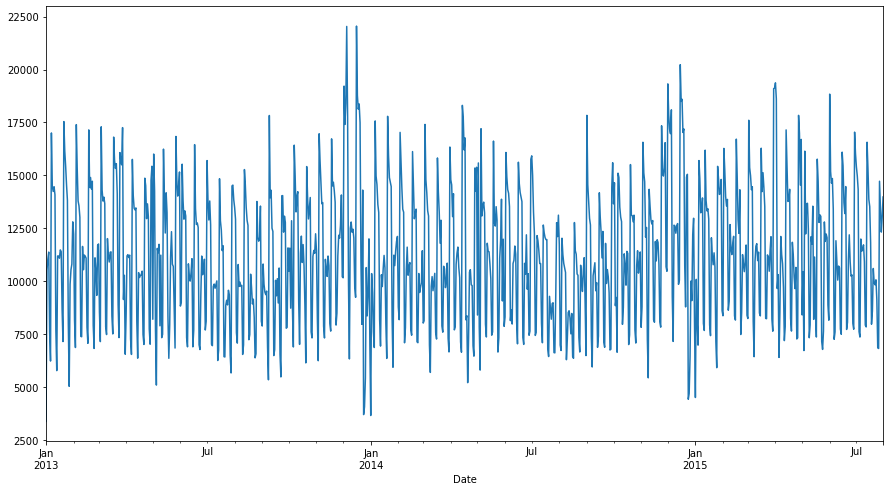

In [66]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

In [67]:
mean=data1['Sales'].rolling(window=7).mean()
std=data1['Sales'].rolling(window=7).std()

In [68]:
mean

Date
2015-07-31             NaN
2015-07-30             NaN
2015-07-29             NaN
2015-07-28             NaN
2015-07-27             NaN
                  ...     
2013-01-05    12584.285714
2013-01-04    12197.571429
2013-01-03    11708.857143
2013-01-02    11178.285714
2013-01-01     9591.714286
Name: Sales, Length: 942, dtype: float64

In [69]:
std

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
                 ...     
2013-01-05    4019.767975
2013-01-04    3981.586403
2013-01-03    3865.581260
2013-01-02    3712.102626
2013-01-01    4378.757804
Name: Sales, Length: 942, dtype: float64

In [70]:
mean.head(20)

Date
2015-07-31             NaN
2015-07-30             NaN
2015-07-29             NaN
2015-07-28             NaN
2015-07-27             NaN
2015-07-26             NaN
2015-07-25    11616.428571
2015-07-24    10922.571429
2015-07-23    10499.571429
2015-07-22    10143.714286
2015-07-21     9618.428571
2015-07-20     9029.714286
2015-07-19     9282.285714
2015-07-18     9441.857143
2015-07-17     9828.285714
2015-07-16    10322.714286
2015-07-15    10899.428571
2015-07-14    11673.000000
2015-07-13    12525.000000
2015-07-12    12417.857143
Name: Sales, dtype: float64

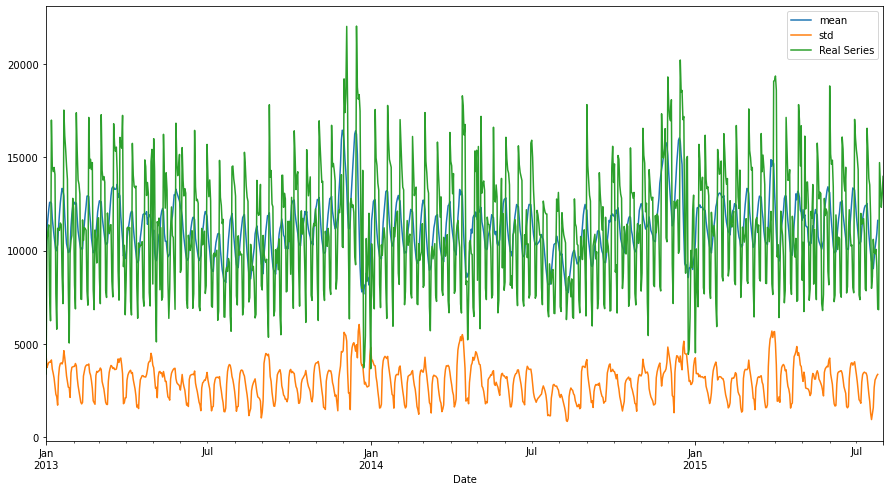

In [71]:
plt.figure(figsize=(15,8))
mean.plot(label='mean')
std.plot(label='std')
data1['Sales'].plot(label='Real Series')
plt.legend()
plt.show()

In [72]:
data1['Sales'].isnull().sum()

0

rolling mean is not stationary and varies with time, have to eliminate trend and seasonality

#### Augmented Dicky fullers test

In [73]:
# H0: series is non stationary
# H1: serires is stationary 
# threshold: 0.5

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
adfuller(data1['Sales'])

(-5.137503663710518,
 1.1778394359421922e-05,
 22,
 919,
 {'1%': -3.437485646962348,
  '5%': -2.8646901138095378,
  '10%': -2.568447319459459},
 16436.089968080574)

In [76]:
result=adfuller(data1['Sales'])
labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

for value,label in zip(result,labels):
    print("{} : {}".format(label,value))
    

ADf Test Statics : -5.137503663710518
p-value : 1.1778394359421922e-05
lags used : 22
No of observations used : 919
Critical values : {'1%': -3.437485646962348, '5%': -2.8646901138095378, '10%': -2.568447319459459}


In [77]:
def test_for_stationarity(feature):
    mean=data1[feature].rolling(window=7).mean()
    std=data1[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,8))
    mean.plot(label='mean')
    std.plot(label='std')
    data1[feature].plot(label='Real Series')
    plt.legend()
    plt.show()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

    for value,label in zip(result,labels):
        print("{} : {}".format(label,value))
    
    
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary')
    else:
        print('Weak evidence against the null hypothesis i.e we are accepting the null hypothesis and we can state that our data is non-Stationary')
     

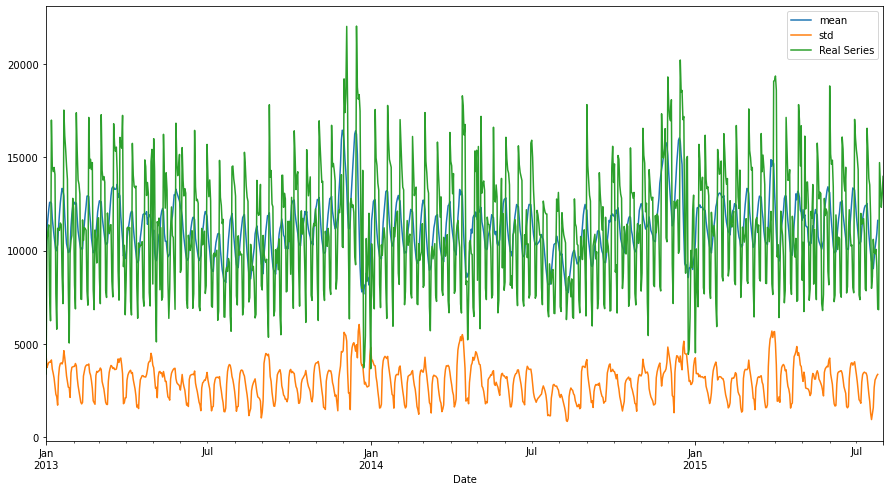

ADf Test Statics : -5.137503663710518
p-value : 1.1778394359421922e-05
lags used : 22
No of observations used : 919
Critical values : {'1%': -3.437485646962348, '5%': -2.8646901138095378, '10%': -2.568447319459459}
Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary


In [78]:
test_for_stationarity('Sales')

<AxesSubplot:xlabel='Date'>

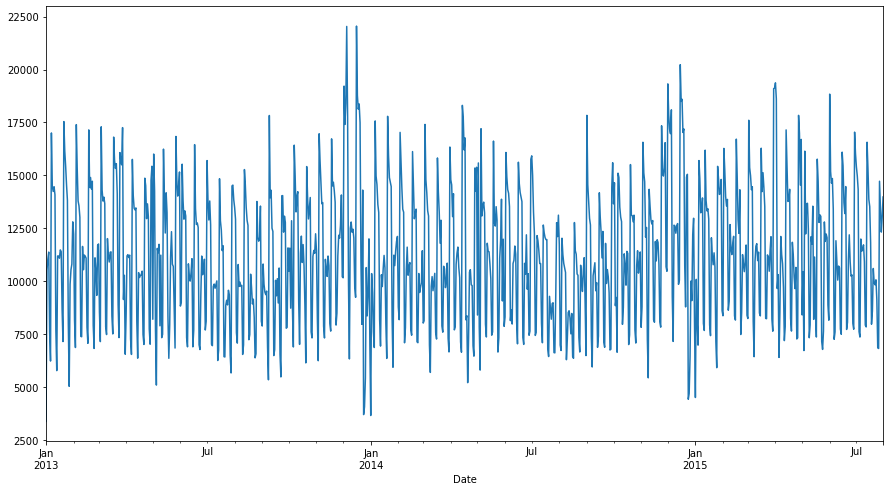

In [79]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

<AxesSubplot:xlabel='Date'>

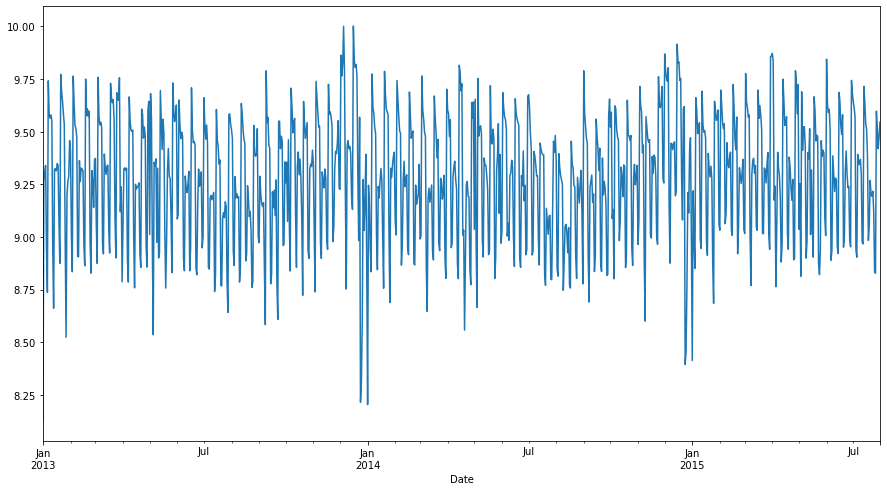

In [80]:
plt.figure(figsize=(15,8))
np.log(data1['Sales']).plot()

In [81]:
log_data=np.log(data1['Sales'])
log_data

Date
2015-07-31    9.545311
2015-07-30    9.474703
2015-07-29    9.418979
2015-07-28    9.517457
2015-07-27    9.597098
                ...   
2013-01-05    8.934982
2013-01-04    9.339261
2013-01-03    9.309371
2013-01-02    9.261604
2013-01-01    8.124151
Name: Sales, Length: 942, dtype: float64

In [82]:
rolling_avg=log_data-log_data.shift(7)
rolling_avg

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.011783
2013-01-04   -0.213463
2013-01-03   -0.269909
2013-01-02   -0.302207
2013-01-01   -1.456442
Name: Sales, Length: 942, dtype: float64

In [83]:
Rolling_average=log_data.rolling(window=7).mean()

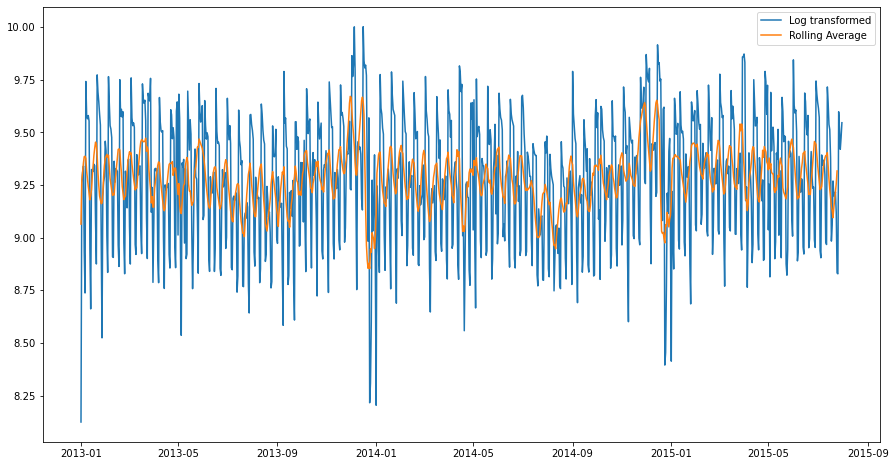

In [84]:
plt.figure(figsize=(15,8))
plt.plot(log_data, label='Log transformed')
plt.plot(Rolling_average, label='Rolling Average')
plt.legend()

In [85]:
lr_diff=log_data-Rolling_average

In [86]:
lr_diff

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.449210
2013-01-04   -0.014436
2013-01-03   -0.005768
2013-01-02   -0.010363
2013-01-01   -0.939753
Name: Sales, Length: 942, dtype: float64

In [87]:
data1['lr_diff']=lr_diff

In [88]:
log_ts=log_data-log_data.shift(7)
log_ts

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.011783
2013-01-04   -0.213463
2013-01-03   -0.269909
2013-01-02   -0.302207
2013-01-01   -1.456442
Name: Sales, Length: 942, dtype: float64

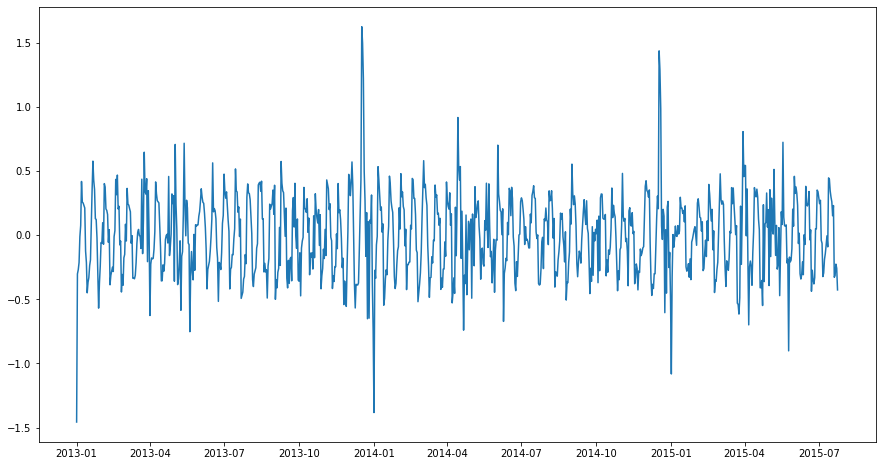

In [89]:
plt.figure(figsize=(15,8))
plt.plot(log_ts)

In [90]:
# With respect to seasonality this is my trend

In [91]:
data1['log_ts']=log_ts

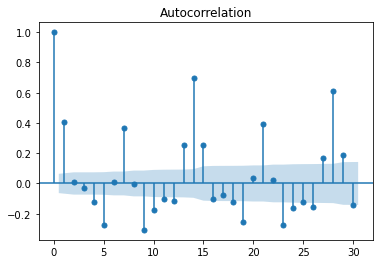

In [92]:
plot_acf(data1['Sales']);

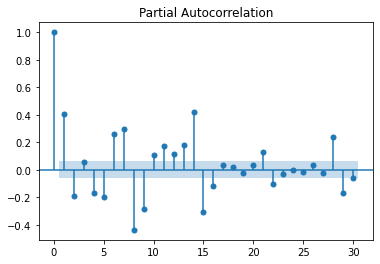

In [93]:
plot_pacf(data1['Sales']);

In [94]:
df2_decompose= seasonal_decompose(data['Sales'], model='additive')

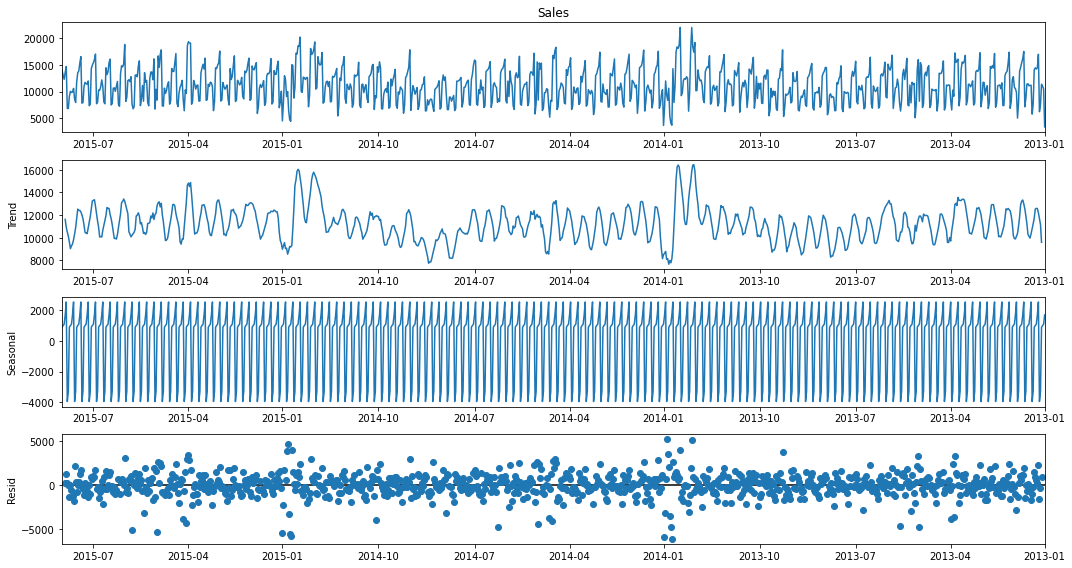

In [95]:
plt.rcParams['figure.figsize']=[15,8]
df2_decompose.plot();
plt.show()

Text(0.5, 0, 'Days')

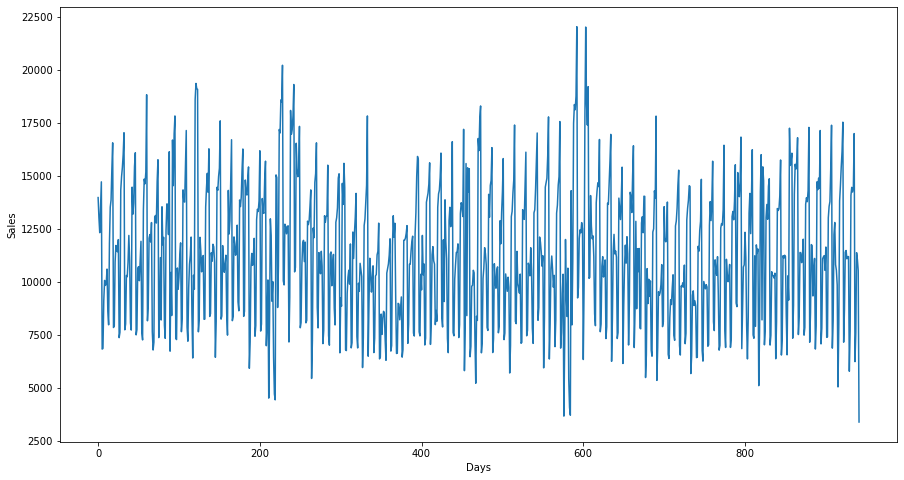

In [96]:
x=list(range(len(data2.index)))
y=data.Sales

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

In [97]:
## Let's apply fourier transform

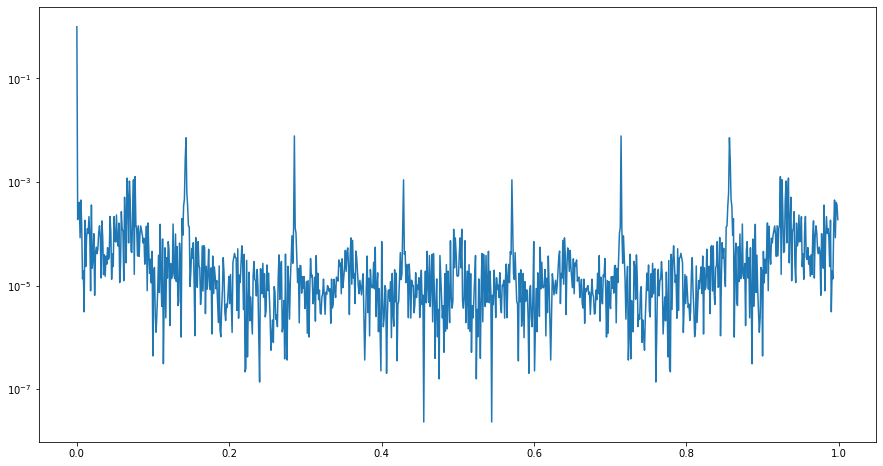

In [98]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

In [99]:
# Fourier transform with X-axix in days (also adding time period)

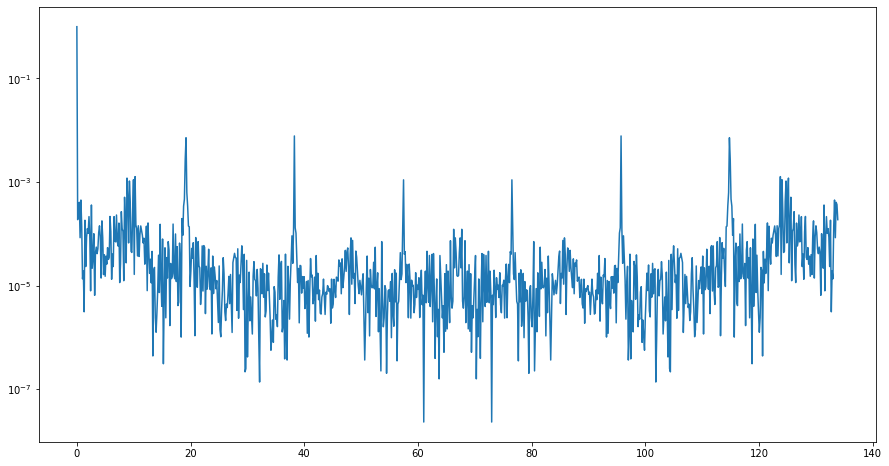

In [100]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/134)
plt.semilogy(results['period'], results['nspectrum'])

In [101]:
# Let's regroup the sales data to make the plot smoother

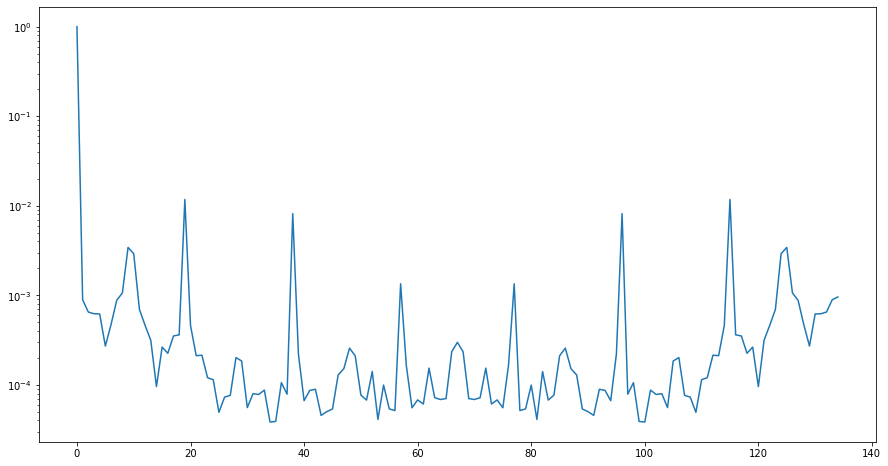

In [102]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [104]:
data=data.reindex(index=data.index[::-1])

In [105]:
data

Sales
Date             
2013-01-01   3375
2013-01-02  10526
2013-01-03  11041
2013-01-04  11376
2013-01-05   7593
...           ...
2015-07-27  14722
2015-07-28  13595
2015-07-29  12320
2015-07-30  13026
2015-07-31  13979

[942 rows x 1 columns]

In [106]:
dataa=data.copy()

In [107]:
dataa

Sales
Date             
2013-01-01   3375
2013-01-02  10526
2013-01-03  11041
2013-01-04  11376
2013-01-05   7593
...           ...
2015-07-27  14722
2015-07-28  13595
2015-07-29  12320
2015-07-30  13026
2015-07-31  13979

[942 rows x 1 columns]

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
dataa['Sales']=scaler.fit_transform(np.array(dataa['Sales']).reshape(-1,1))

In [109]:
train_end=datetime(2015,1,31)
test_end=datetime(2015,7,31)

In [110]:
dataa

Sales
Date                
2013-01-01  0.100000
2013-01-02  0.444590
2013-01-03  0.469406
2013-01-04  0.485549
2013-01-05  0.303255
...              ...
2015-07-27  0.646785
2015-07-28  0.592477
2015-07-29  0.531038
2015-07-30  0.565059
2015-07-31  0.610981

[942 rows x 1 columns]

In [111]:
train=dataa[:train_end]
test=dataa[train_end+timedelta(days=1):test_end]

In [112]:
data.shape

(942, 1)

In [113]:
train.shape

(761, 1)

In [114]:
test.shape

(181, 1)

***AR Model***

In [115]:
model_ar=ARMA(data['Sales'], order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar=model_ar.fit()

In [116]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(1, 0)   Log Likelihood               -8868.317
Method:                       css-mle   S.D. of innovations           2967.017
Date:                Mon, 21 Mar 2022   AIC                          17742.633
Time:                        20:11:09   BIC                          17757.177
Sample:                    01-01-2013   HQIC                         17748.177
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    163.793     68.400      0.000    1.09e+04    1.15e+04
ar.L1.Sales     0.4102      0.030     13.762      0.000       0.352       0.469
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4376           +0.0000j            2.4376            0.0000
-----------------------------------------------------------------------------
"""

In [117]:
model_ar_t=ARMA(train, order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_t=model_ar_t.fit()
result_ar_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(1, 0)   Log Likelihood                 397.775
Method:                       css-mle   S.D. of innovations              0.143
Date:                Mon, 21 Mar 2022   AIC                           -789.551
Time:                        20:11:09   BIC                           -775.647
Sample:                    01-01-2013   HQIC                          -784.197
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.009     53.305      0.000       0.455       0.490
ar.L1.Sales     0.4138      0.033     12.494      0.000       0.349       0.479
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4163           +0.0000j            2.4163            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
model_ar_2=ARMA(data['Sales'], order=(2,0)) 
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(2, 0)   Log Likelihood               -8850.510
Method:                       css-mle   S.D. of innovations           2911.340
Date:                Mon, 21 Mar 2022   AIC                          17709.019
Time:                        20:11:09   BIC                          17728.411
Sample:                    01-01-2013   HQIC                         17716.411
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    134.772     83.158      0.000    1.09e+04    1.15e+04
ar.L1.Sales     0.4894      0.032     15.260      0.000       0.427       0.552
ar.L2.Sales    -0.1932      0.032     -6.025      0.000      -0.256      -0.130
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2669           -1.8900j            2.2753           -0.1560
AR.2            1.2669           +1.8900j            2.2753            0.1560
-----------------------------------------------------------------------------
"""

In [119]:
model_ar_2t=ARMA(train, order=(2,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_2t=model_ar_2t.fit()
result_ar_2t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(2, 0)   Log Likelihood                 411.361
Method:                       css-mle   S.D. of innovations              0.141
Date:                Mon, 21 Mar 2022   AIC                           -814.722
Time:                        20:11:09   BIC                           -796.184
Sample:                    01-01-2013   HQIC                          -807.584
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.007     64.424      0.000       0.458       0.487
ar.L1.Sales     0.4921      0.036     13.753      0.000       0.422       0.562
ar.L2.Sales    -0.1882      0.036     -5.260      0.000      -0.258      -0.118
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3072           -1.8986j            2.3051           -0.1540
AR.2            1.3072           +1.8986j            2.3051            0.1540
-----------------------------------------------------------------------------
"""

In [120]:
model_ar_3=ARMA(data['Sales'], order=(3,0)) 
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(3, 0)   Log Likelihood               -8848.904
Method:                       css-mle   S.D. of innovations           2906.366
Date:                Mon, 21 Mar 2022   AIC                          17707.808
Time:                        20:11:09   BIC                          17732.048
Sample:                    01-01-2013   HQIC                         17717.048
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    142.826     78.443      0.000    1.09e+04    1.15e+04
ar.L1.Sales     0.5007      0.033     15.341      0.000       0.437       0.565
ar.L2.Sales    -0.2218      0.036     -6.203      0.000      -0.292      -0.152
ar.L3.Sales     0.0584      0.033      1.790      0.073      -0.006       0.122
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4576           -2.3935j            2.4368           -0.2199
AR.2            0.4576           +2.3935j            2.4368            0.2199
AR.3            2.8854           -0.0000j            2.8854           -0.0000
-----------------------------------------------------------------------------
"""

In [121]:
model_ar_3t=ARMA(train, order=(3,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_3t=model_ar_3t.fit()
result_ar_3t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(3, 0)   Log Likelihood                 413.722
Method:                       css-mle   S.D. of innovations              0.140
Date:                Mon, 21 Mar 2022   AIC                           -817.444
Time:                        20:11:10   BIC                           -794.271
Sample:                    01-01-2013   HQIC                          -808.521
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.008     59.544      0.000       0.457       0.488
ar.L1.Sales     0.5069      0.036     13.959      0.000       0.436       0.578
ar.L2.Sales    -0.2271      0.040     -5.692      0.000      -0.305      -0.149
ar.L3.Sales     0.0790      0.036      2.176      0.030       0.008       0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3997           -0.0000j            2.3997           -0.0000
AR.2            0.2378           -2.2845j            2.2968           -0.2335
AR.3            0.2378           +2.2845j            2.2968            0.2335
-----------------------------------------------------------------------------
"""

In [122]:
model_ar_4=ARMA(data['Sales'], order=(4,0)) 
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(4, 0)   Log Likelihood               -8835.604
Method:                       css-mle   S.D. of innovations           2865.447
Date:                Mon, 21 Mar 2022   AIC                          17683.208
Time:                        20:11:10   BIC                          17712.296
Sample:                    01-01-2013   HQIC                         17694.296
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    120.735     92.826      0.000     1.1e+04    1.14e+04
ar.L1.Sales     0.5105      0.032     15.840      0.000       0.447       0.574
ar.L2.Sales    -0.2590      0.036     -7.197      0.000      -0.330      -0.188
ar.L3.Sales     0.1422      0.036      3.954      0.000       0.072       0.213
ar.L4.Sales    -0.1672      0.032     -5.195      0.000      -0.230      -0.104
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1545           -0.9329j            1.4843           -0.1082
AR.2            1.1545           +0.9329j            1.4843            0.1082
AR.3           -0.7294           -1.4772j            1.6475           -0.3230
AR.4           -0.7294           +1.4772j            1.6475            0.3230
-----------------------------------------------------------------------------
"""

In [123]:
model_ar_4t=ARMA(train, order=(4,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_4t=model_ar_4t.fit()
result_ar_4t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(4, 0)   Log Likelihood                 423.595
Method:                       css-mle   S.D. of innovations              0.139
Date:                Mon, 21 Mar 2022   AIC                           -835.190
Time:                        20:11:10   BIC                           -807.382
Sample:                    01-01-2013   HQIC                          -824.482
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.007     69.949      0.000       0.459       0.486
ar.L1.Sales     0.5199      0.036     14.458      0.000       0.449       0.590
ar.L2.Sales    -0.2639      0.040     -6.556      0.000      -0.343      -0.185
ar.L3.Sales     0.1606      0.040      3.994      0.000       0.082       0.239
ar.L4.Sales    -0.1607      0.036     -4.473      0.000      -0.231      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1999           -0.9319j            1.5193           -0.1051
AR.2            1.1999           +0.9319j            1.5193            0.1051
AR.3           -0.7005           -1.4848j            1.6417           -0.3202
AR.4           -0.7005           +1.4848j            1.6417            0.3202
-----------------------------------------------------------------------------
"""

In [124]:
from scipy.stats.distributions import chi2

In [125]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [126]:
LLR_test(model_ar, model_ar_2)

0.0

In [127]:
LLR_test(model_ar_t, model_ar_2t)

0.0

In [128]:
LLR_test(model_ar_2, model_ar_3)

0.073

In [129]:
LLR_test(model_ar_2t, model_ar_3t)

0.03

In [130]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [131]:
LLR_test(model_ar_3t, model_ar_4t)

0.0

In [132]:
model_ar_5=ARMA(data['Sales'], order=(5,0)) 
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print(LLR_test(model_ar_4, model_ar_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(5, 0)   Log Likelihood               -8817.870
Method:                       css-mle   S.D. of innovations           2811.727
Date:                Mon, 21 Mar 2022   AIC                          17649.741
Time:                        20:11:12   BIC                          17683.677
Sample:                    01-01-2013   HQIC                         17662.676
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04     99.259    112.892      0.000     1.1e+04    1.14e+04
ar.L1.Sales     0.4772      0.032     14.864      0.000       0.414       0.540
ar.L2.Sales    -0.2313      0.036     -6.495    

In [133]:
model_ar_5t=ARMA(train, order=(5,0)) 
result_ar_5t=model_ar_5t.fit()
print(result_ar_5t.summary())
print(LLR_test(model_ar_4t, model_ar_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(5, 0)   Log Likelihood                 437.636
Method:                       css-mle   S.D. of innovations              0.136
Date:                Mon, 21 Mar 2022   AIC                           -861.272
Time:                        20:11:12   BIC                           -828.829
Sample:                    01-01-2013   HQIC                          -848.779
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4727      0.006     84.895      0.000       0.462       0.484
ar.L1.Sales     0.4884      0.036     13.649      0.000       0.418       0.559
ar.L2.Sales    -0.2326      0.040     -5.827    

In [134]:
model_ar_6=ARMA(data['Sales'], order=(6,0)) 
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print(LLR_test(model_ar_5, model_ar_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(6, 0)   Log Likelihood               -8783.954
Method:                       css-mle   S.D. of innovations           2711.664
Date:                Mon, 21 Mar 2022   AIC                          17583.908
Time:                        20:11:13   BIC                          17622.692
Sample:                    01-01-2013   HQIC                         17598.692
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    130.401     85.888      0.000    1.09e+04    1.15e+04
ar.L1.Sales     0.5292      0.032     16.765      0.000       0.467       0.591
ar.L2.Sales    -0.2122      0.034     -6.170    

In [135]:
model_ar_6t=ARMA(train, order=(6,0)) 
result_ar_6t=model_ar_6t.fit()
print(result_ar_6t.summary())
print(LLR_test(model_ar_5t, model_ar_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(6, 0)   Log Likelihood                 466.549
Method:                       css-mle   S.D. of innovations              0.131
Date:                Mon, 21 Mar 2022   AIC                           -917.097
Time:                        20:11:14   BIC                           -880.020
Sample:                    01-01-2013   HQIC                          -902.820
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.007     64.005      0.000       0.458       0.487
ar.L1.Sales     0.5415      0.035     15.428      0.000       0.473       0.610
ar.L2.Sales    -0.2151      0.038     -5.591    

In [136]:
model_ar_7=ARMA(data['Sales'], order=(7,0)) 
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print(LLR_test(model_ar_6, model_ar_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(7, 0)   Log Likelihood               -8742.107
Method:                       css-mle   S.D. of innovations           2592.969
Date:                Mon, 21 Mar 2022   AIC                          17502.215
Time:                        20:11:16   BIC                          17545.847
Sample:                    01-01-2013   HQIC                         17518.846
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    175.449     63.813      0.000    1.09e+04    1.15e+04
ar.L1.Sales     0.4480      0.031     14.269      0.000       0.386       0.510
ar.L2.Sales    -0.1159      0.034     -3.364    

In [137]:
model_ar_7t=ARMA(train, order=(7,0)) 
result_ar_7t=model_ar_7t.fit()
print(result_ar_7t.summary())
print(LLR_test(model_ar_6t, model_ar_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(7, 0)   Log Likelihood                 503.216
Method:                       css-mle   S.D. of innovations              0.125
Date:                Mon, 21 Mar 2022   AIC                           -988.432
Time:                        20:11:18   BIC                           -946.720
Sample:                    01-01-2013   HQIC                          -972.370
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4723      0.010     47.020      0.000       0.453       0.492
ar.L1.Sales     0.4545      0.035     13.041      0.000       0.386       0.523
ar.L2.Sales    -0.1135      0.038     -2.955    

In [138]:
model_ar_8=ARMA(data['Sales'], order=(8,0)) 
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(8, 0)   Log Likelihood               -8640.153
Method:                       css-mle   S.D. of innovations           2324.782
Date:                Mon, 21 Mar 2022   AIC                          17300.305
Time:                        20:11:20   BIC                          17348.785
Sample:                    01-01-2013   HQIC                         17318.785
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    109.930    101.897      0.000     1.1e+04    1.14e+04
ar.L1.Sales     0.5796      0.029     19.693      0.000       0.522       0.637
ar.L2.Sales    -0.0627      0.031     -2.020    

In [139]:
model_ar_8t=ARMA(train, order=(8,0)) 
result_ar_8t=model_ar_8t.fit()
print(result_ar_8t.summary())
print(LLR_test(model_ar_7t, model_ar_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(8, 0)   Log Likelihood                 589.116
Method:                       css-mle   S.D. of innovations              0.111
Date:                Mon, 21 Mar 2022   AIC                          -1158.232
Time:                        20:11:23   BIC                          -1111.886
Sample:                    01-01-2013   HQIC                         -1140.386
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4724      0.006     75.690      0.000       0.460       0.485
ar.L1.Sales     0.5944      0.033     18.218      0.000       0.530       0.658
ar.L2.Sales    -0.0604      0.034     -1.755    

***MA Model***

In [140]:
model_ma_1=ARMA(data['Sales'], order=(0,1)) 
result_ma_1=model_ma_1.fit()
print(result_ma_1.summary())
##print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 1)   Log Likelihood               -8848.273
Method:                       css-mle   S.D. of innovations           2904.416
Date:                Mon, 21 Mar 2022   AIC                          17702.545
Time:                        20:11:25   BIC                          17717.089
Sample:                    01-01-2013   HQIC                         17708.089
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    140.758     79.622      0.000    1.09e+04    1.15e+04
ma.L1.Sales     0.4880      0.027     17.930      0.000       0.435       0.541
                                    Roots       

In [141]:
model_ma_2=ARMA(data['Sales'], order=(0,2)) 
result_ma_2=model_ma_2.fit()
print(result_ma_2.summary())
print(LLR_test(model_ma_1, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 2)   Log Likelihood               -8847.662
Method:                       css-mle   S.D. of innovations           2902.528
Date:                Mon, 21 Mar 2022   AIC                          17703.325
Time:                        20:11:25   BIC                          17722.717
Sample:                    01-01-2013   HQIC                         17710.716
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    146.010     76.743      0.000    1.09e+04    1.15e+04
ma.L1.Sales     0.5079      0.033     15.181      0.000       0.442       0.573
ma.L2.Sales     0.0367      0.033      1.109    

In [142]:
model_ma_3=ARMA(data['Sales'], order=(0,3)) 
result_ma_3=model_ma_3.fit()
print(result_ma_3.summary())
print(LLR_test(model_ma_2, model_ma_3))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 3)   Log Likelihood               -8845.167
Method:                       css-mle   S.D. of innovations           2894.743
Date:                Mon, 21 Mar 2022   AIC                          17700.335
Time:                        20:11:25   BIC                          17724.575
Sample:                    01-01-2013   HQIC                         17709.574
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    131.316     85.347      0.000     1.1e+04    1.15e+04
ma.L1.Sales     0.5202      0.033     15.810      0.000       0.456       0.585
ma.L2.Sales     0.0097      0.035      0.276    

In [143]:
model_ma_4=ARMA(data['Sales'], order=(0,4)) 
result_ma_4=model_ma_4.fit()
print(result_ma_4.summary())
print(LLR_test(model_ma_3, model_ma_4))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 4)   Log Likelihood               -8843.926
Method:                       css-mle   S.D. of innovations           2890.883
Date:                Mon, 21 Mar 2022   AIC                          17699.852
Time:                        20:11:26   BIC                          17728.940
Sample:                    01-01-2013   HQIC                         17710.940
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    140.825     79.584      0.000    1.09e+04    1.15e+04
ma.L1.Sales     0.5180      0.032     16.094      0.000       0.455       0.581
ma.L2.Sales     0.0429      0.043      0.992    

In [144]:
model_ma_5=ARMA(data['Sales'], order=(0,5)) 
result_ma_5=model_ma_5.fit()
print(result_ma_5.summary())
print(LLR_test(model_ma_4, model_ma_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 5)   Log Likelihood               -8797.899
Method:                       css-mle   S.D. of innovations           2751.528
Date:                Mon, 21 Mar 2022   AIC                          17609.797
Time:                        20:11:26   BIC                          17643.733
Sample:                    01-01-2013   HQIC                         17622.733
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.12e+04    116.017     96.532      0.000     1.1e+04    1.14e+04
ma.L1.Sales     0.3457      0.030     11.656      0.000       0.288       0.404
ma.L2.Sales     0.2753      0.032      8.586    

In [145]:
model_ma_6=ARMA(data['Sales'], order=(0,6)) 
result_ma_6=model_ma_6.fit()
print(result_ma_6.summary())
print(LLR_test(model_ma_5, model_ma_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 6)   Log Likelihood               -8751.566
Method:                       css-mle   S.D. of innovations           2619.132
Date:                Mon, 21 Mar 2022   AIC                          17519.131
Time:                        20:11:27   BIC                          17557.915
Sample:                    01-01-2013   HQIC                         17533.915
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    107.660    104.100      0.000     1.1e+04    1.14e+04
ma.L1.Sales     0.5267      0.030     17.288      0.000       0.467       0.586
ma.L2.Sales     0.2365      0.030      7.879    

In [146]:
model_ma_7=ARMA(data['Sales'], order=(0,7)) 
result_ma_7=model_ma_7.fit()
print(result_ma_7.summary())
print(LLR_test(model_ma_6, model_ma_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 7)   Log Likelihood               -8747.483
Method:                       css-mle   S.D. of innovations           2608.244
Date:                Mon, 21 Mar 2022   AIC                          17512.966
Time:                        20:11:28   BIC                          17556.598
Sample:                    01-01-2013   HQIC                         17529.597
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    116.935     95.843      0.000     1.1e+04    1.14e+04
ma.L1.Sales     0.4884      0.033     14.942      0.000       0.424       0.553
ma.L2.Sales     0.1747      0.036      4.853    

In [147]:
model_ma_8=ARMA(data['Sales'], order=(0,8)) 
result_ma_8=model_ma_8.fit()
print(result_ma_8.summary())
print(LLR_test(model_ma_7, model_ma_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 8)   Log Likelihood               -8740.857
Method:                       css-mle   S.D. of innovations           2588.791
Date:                Mon, 21 Mar 2022   AIC                          17501.714
Time:                        20:11:31   BIC                          17550.194
Sample:                    01-01-2013   HQIC                         17520.193
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.121e+04    119.292     93.949      0.000     1.1e+04    1.14e+04
ma.L1.Sales     0.4926      0.032     15.414      0.000       0.430       0.555
ma.L2.Sales     0.1655      0.037      4.522    

In [148]:
model_ma_t=ARMA(train, order=(0,1)) 
result_ma_t=model_ma_t.fit()
print(result_ma_t.summary())
#print(LLR_test(model_ma_t, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 1)   Log Likelihood                 414.299
Method:                       css-mle   S.D. of innovations              0.140
Date:                Mon, 21 Mar 2022   AIC                           -822.599
Time:                        20:11:33   BIC                           -808.695
Sample:                    01-01-2013   HQIC                          -817.245
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.008     62.175      0.000       0.458       0.487
ma.L1.Sales     0.4945      0.030     16.294      0.000       0.435       0.554
                                    Roots       

In [149]:
model_ma_2t=ARMA(train, order=(0,2)) 
result_ma_2t=model_ma_2t.fit()
print(result_ma_2t.summary())
print(LLR_test(model_ma_t, model_ma_2t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 2)   Log Likelihood                 414.749
Method:                       css-mle   S.D. of innovations              0.140
Date:                Mon, 21 Mar 2022   AIC                           -821.498
Time:                        20:11:33   BIC                           -802.959
Sample:                    01-01-2013   HQIC                          -814.359
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.008     60.050      0.000       0.457       0.488
ma.L1.Sales     0.5133      0.037     13.815      0.000       0.441       0.586
ma.L2.Sales     0.0349      0.037      0.951    

In [150]:
model_ma_3t=ARMA(train, order=(0,3)) 
result_ma_3t=model_ma_3t.fit()
print(result_ma_3t.summary())
print(LLR_test(model_ma_2t, model_ma_3t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 3)   Log Likelihood                 416.250
Method:                       css-mle   S.D. of innovations              0.140
Date:                Mon, 21 Mar 2022   AIC                           -822.500
Time:                        20:11:33   BIC                           -799.327
Sample:                    01-01-2013   HQIC                          -813.577
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.007     65.720      0.000       0.459       0.487
ma.L1.Sales     0.5292      0.037     14.172      0.000       0.456       0.602
ma.L2.Sales     0.0169      0.039      0.437    

In [151]:
model_ma_4t=ARMA(train, order=(0,4)) 
result_ma_4t=model_ma_4t.fit()
print(result_ma_4t.summary())
print(LLR_test(model_ma_3t, model_ma_4t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 4)   Log Likelihood                 418.176
Method:                       css-mle   S.D. of innovations              0.140
Date:                Mon, 21 Mar 2022   AIC                           -824.352
Time:                        20:11:33   BIC                           -796.544
Sample:                    01-01-2013   HQIC                          -813.644
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.008     60.178      0.000       0.457       0.488
ma.L1.Sales     0.5257      0.036     14.757      0.000       0.456       0.595
ma.L2.Sales     0.0643      0.048      1.339    

In [152]:
model_ma_5t=ARMA(train, order=(0,5)) 
result_ma_5t=model_ma_5t.fit()
print(result_ma_5t.summary())
print(LLR_test(model_ma_4t, model_ma_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 5)   Log Likelihood                 453.325
Method:                       css-mle   S.D. of innovations              0.133
Date:                Mon, 21 Mar 2022   AIC                           -892.650
Time:                        20:11:34   BIC                           -860.208
Sample:                    01-01-2013   HQIC                          -880.158
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4726      0.007     71.256      0.000       0.460       0.486
ma.L1.Sales     0.3521      0.033     10.524      0.000       0.287       0.418
ma.L2.Sales     0.2912      0.036      8.082    

In [153]:
model_ma_6t=ARMA(train, order=(0,6)) 
result_ma_6t=model_ma_6t.fit()
print(result_ma_6t.summary())
print(LLR_test(model_ma_5t, model_ma_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 6)   Log Likelihood                 493.805
Method:                       css-mle   S.D. of innovations              0.126
Date:                Mon, 21 Mar 2022   AIC                           -971.609
Time:                        20:11:35   BIC                           -934.532
Sample:                    01-01-2013   HQIC                          -957.332
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.006     77.341      0.000       0.461       0.484
ma.L1.Sales     0.5455      0.034     16.145      0.000       0.479       0.612
ma.L2.Sales     0.2532      0.034      7.532    

In [154]:
model_ma_7t=ARMA(train, order=(0,7)) 
result_ma_7t=model_ma_7t.fit()
print(result_ma_7t.summary())
print(LLR_test(model_ma_6t, model_ma_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 7)   Log Likelihood                 497.434
Method:                       css-mle   S.D. of innovations              0.126
Date:                Mon, 21 Mar 2022   AIC                           -976.868
Time:                        20:11:36   BIC                           -935.156
Sample:                    01-01-2013   HQIC                          -960.807
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.007     71.470      0.000       0.460       0.486
ma.L1.Sales     0.5007      0.037     13.660      0.000       0.429       0.573
ma.L2.Sales     0.1880      0.040      4.668    

In [155]:
model_ma_8t=ARMA(train, order=(0,8)) 
result_ma_8t=model_ma_8t.fit()
print(result_ma_8t.summary())
print(LLR_test(model_ma_7t, model_ma_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 8)   Log Likelihood                 501.490
Method:                       css-mle   S.D. of innovations              0.125
Date:                Mon, 21 Mar 2022   AIC                           -982.980
Time:                        20:11:38   BIC                           -936.633
Sample:                    01-01-2013   HQIC                          -965.134
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.007     68.914      0.000       0.459       0.486
ma.L1.Sales     0.5081      0.036     14.081      0.000       0.437       0.579
ma.L2.Sales     0.1713      0.041      4.180    

In [156]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [157]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [158]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [159]:
len(test)

181

In [160]:
predictions=result_ar_8t.predict(start=pred_start, end=pred_end)

In [161]:
predictions

2015-02-01    0.307905
2015-02-02    0.569687
2015-02-03    0.512408
2015-02-04    0.461879
2015-02-05    0.511850
                ...   
2015-07-27    0.472270
2015-07-28    0.472460
2015-07-29    0.472569
2015-07-30    0.472342
2015-07-31    0.472347
Freq: D, Length: 181, dtype: float64

In [162]:
pred=predictions.cumsum()
pred

2015-02-01     0.307905
2015-02-02     0.877592
2015-02-03     1.390000
2015-02-04     1.851879
2015-02-05     2.363729
                ...    
2015-07-27    83.533676
2015-07-28    84.006136
2015-07-29    84.478706
2015-07-30    84.951047
2015-07-31    85.423394
Freq: D, Length: 181, dtype: float64

In [163]:
ma_pred=pd.DataFrame(pred, columns=train.columns)
ma_pred

Sales
2015-02-01   0.307905
2015-02-02   0.877592
2015-02-03   1.390000
2015-02-04   1.851879
2015-02-05   2.363729
...               ...
2015-07-27  83.533676
2015-07-28  84.006136
2015-07-29  84.478706
2015-07-30  84.951047
2015-07-31  85.423394

[181 rows x 1 columns]

In [164]:
pred_str=ma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [165]:
len(pred_str)

181

In [166]:
pred_str

Sales  Sales_forecast
2015-02-01   0.307905        0.660023
2015-02-02   0.877592        1.229710
2015-02-03   1.390000        1.742118
2015-02-04   1.851879        2.203997
2015-02-05   2.363729        2.715847
...               ...             ...
2015-07-27  83.533676       83.885794
2015-07-28  84.006136       84.358254
2015-07-29  84.478706       84.830823
2015-07-30  84.951047       85.303165
2015-07-31  85.423394       85.775512

[181 rows x 2 columns]

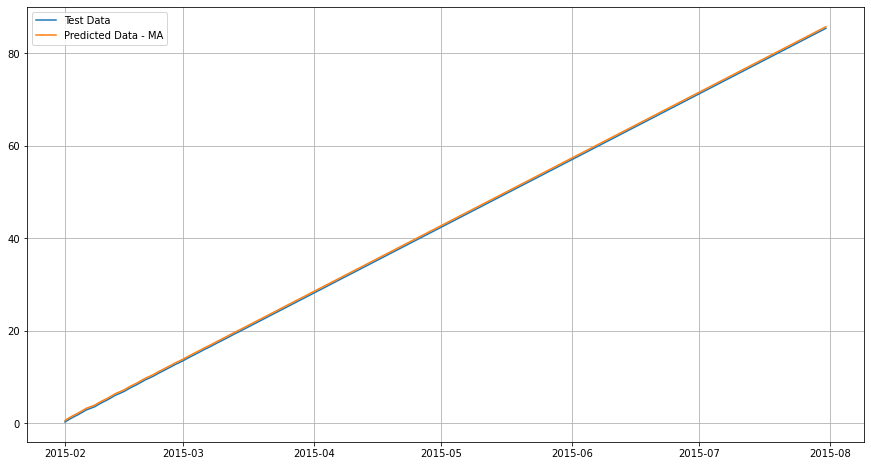

In [167]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - MA')
plt.legend(loc='best')
plt.grid();

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.3521175777694484

In [170]:
def MAPE(y_true, y_predict):
    return np.mean((np.abs(y_true-y_predict))/(y_true))*100

In [171]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

2.6309521790029193

In [172]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.032599
2015-02-02    0.151885
2015-02-03    0.161458
2015-02-04    0.150259
2015-02-05    0.078604
                ...   
2015-07-27    0.174515
2015-07-28    0.120017
2015-07-29    0.058469
2015-07-30    0.092717
2015-07-31    0.138635
Length: 181, dtype: float64

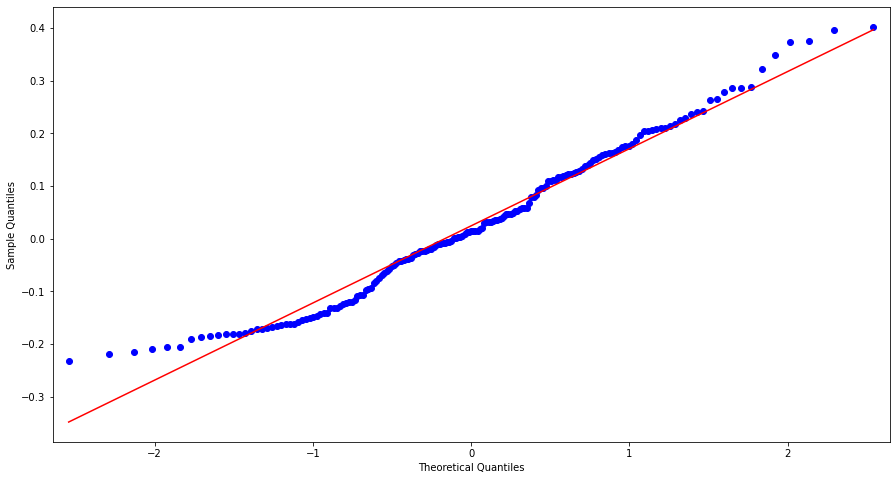

In [173]:
qqplot(residuals, line='s');

***ARMA Model***

In [174]:
model=ARMA(train,(3,5))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(3, 5)   Log Likelihood                 619.457
Method:                       css-mle   S.D. of innovations              0.107
Date:                Mon, 21 Mar 2022   AIC                          -1218.913
Time:                        20:11:55   BIC                          -1172.567
Sample:                    01-01-2013   HQIC                         -1201.067
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4719      0.010     48.310      0.000       0.453       0.491
ar.L1.Sales    -0.5624      0.052    -10.907      0.000      -0.663      -0.461
ar.L2.Sales    -1.0521      0.023    -45.951    

In [175]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [176]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [177]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [178]:
len(test)

181

In [179]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

In [180]:
predictions

2015-02-01    0.314300
2015-02-02    0.480809
2015-02-03    0.489565
2015-02-04    0.367705
2015-02-05    0.470757
                ...   
2015-07-27    0.551099
2015-07-28    0.524219
2015-07-29    0.369402
2015-07-30    0.465057
2015-07-31    0.577311
Freq: D, Length: 181, dtype: float64

In [181]:
pred=predictions.cumsum()
pred

2015-02-01     0.314300
2015-02-02     0.795109
2015-02-03     1.284674
2015-02-04     1.652379
2015-02-05     2.123136
                ...    
2015-07-27    83.339416
2015-07-28    83.863636
2015-07-29    84.233037
2015-07-30    84.698094
2015-07-31    85.275405
Freq: D, Length: 181, dtype: float64

In [182]:
Arma_pred=pd.DataFrame(pred, columns=train.columns)
Arma_pred

Sales
2015-02-01   0.314300
2015-02-02   0.795109
2015-02-03   1.284674
2015-02-04   1.652379
2015-02-05   2.123136
...               ...
2015-07-27  83.339416
2015-07-28  83.863636
2015-07-29  84.233037
2015-07-30  84.698094
2015-07-31  85.275405

[181 rows x 1 columns]

In [183]:
pred_str=Arma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [184]:
len(pred_str)

181

In [185]:
pred_str

Sales  Sales_forecast
2015-02-01   0.314300        0.666418
2015-02-02   0.795109        1.147226
2015-02-03   1.284674        1.636791
2015-02-04   1.652379        2.004497
2015-02-05   2.123136        2.475254
...               ...             ...
2015-07-27  83.339416       83.691534
2015-07-28  83.863636       84.215753
2015-07-29  84.233037       84.585155
2015-07-30  84.698094       85.050212
2015-07-31  85.275405       85.627523

[181 rows x 2 columns]

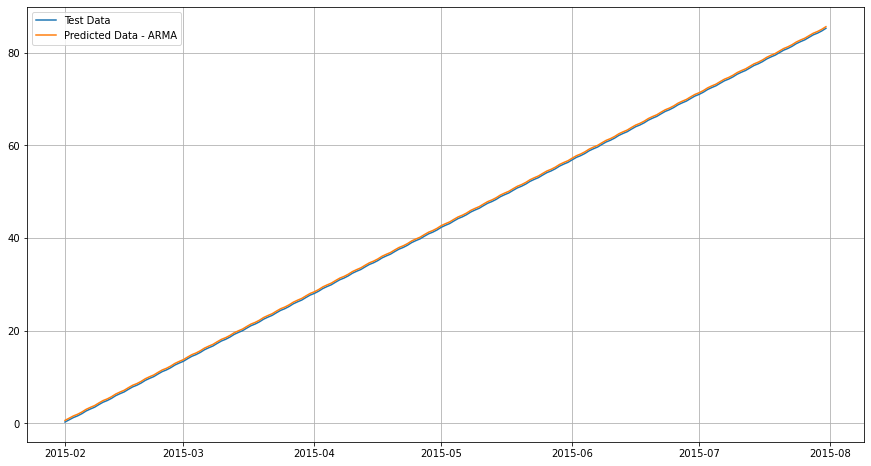

In [186]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - ARMA')
plt.legend(loc='best')
plt.grid();

In [187]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.3521175777694483

In [188]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

2.694655433563052

In [189]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.026204
2015-02-02    0.240763
2015-02-03    0.184302
2015-02-04    0.244432
2015-02-05    0.119697
                ...   
2015-07-27    0.095686
2015-07-28    0.068258
2015-07-29    0.161636
2015-07-30    0.100001
2015-07-31    0.033670
Length: 181, dtype: float64

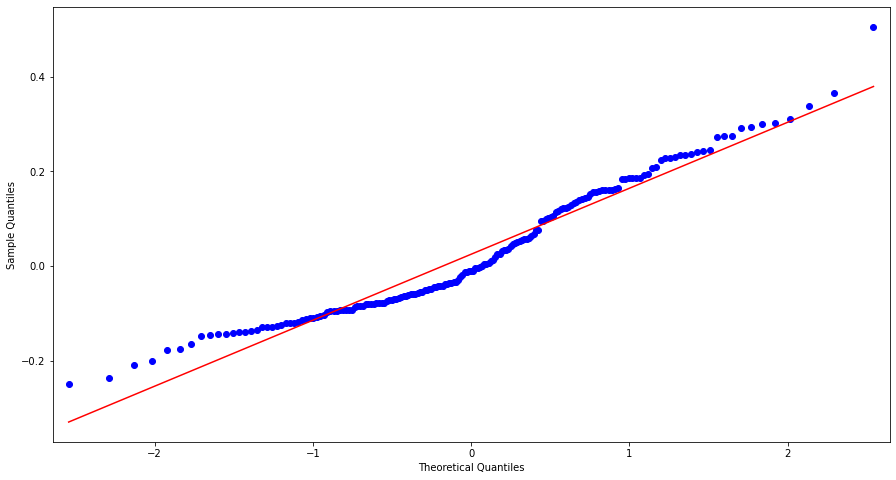

In [190]:
qqplot(residuals, line='s');

In [191]:
final_pred=model_fit.forecast(260)

In [192]:
fv=final_pred[0]
fv

array([0.31430008, 0.48080882, 0.4895647 , 0.3677055 , 0.47075689,
       0.57998064, 0.42452145, 0.38487701, 0.55783274, 0.52062169,
       0.36426871, 0.47093379, 0.57983094, 0.4248252 , 0.38484279,
       0.55755009, 0.5207808 , 0.36448063, 0.47068058, 0.57973161,
       0.42512244, 0.38481001, 0.55726753, 0.52093911, 0.36469273,
       0.4704281 , 0.57963178, 0.42541918, 0.38477796, 0.55698515,
       0.52109661, 0.36490502, 0.47017634, 0.57953143, 0.42571542,
       0.38474664, 0.55670295, 0.5212533 , 0.36511749, 0.46992531,
       0.57943059, 0.42601115, 0.38471605, 0.55642093, 0.52140918,
       0.36533013, 0.46967501, 0.57932924, 0.42630638, 0.38468619,
       0.55613909, 0.52156426, 0.36554296, 0.46942544, 0.57922739,
       0.4266011 , 0.38465705, 0.55585743, 0.52171853, 0.36575595,
       0.46917659, 0.57912504, 0.42689532, 0.38462863, 0.55557596,
       0.521872  , 0.36596912, 0.46892847, 0.5790222 , 0.42718904,
       0.38460093, 0.55529467, 0.52202466, 0.36618247, 0.46868

In [193]:
len(fv)

260

In [194]:
ff=pd.DataFrame(fv, columns=['Forecast'])

In [195]:
ff

Forecast
0    0.314300
1    0.480809
2    0.489565
3    0.367705
4    0.470757
..        ...
255  0.371783
256  0.462503
257  0.576066
258  0.434925
259  0.384119

[260 rows x 1 columns]

In [196]:
date = pd.date_range(start='2015/02/01', periods=260, freq='D')
date

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [197]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [198]:
ff=ff.set_index('Time_Stamp')

In [199]:
ff

Forecast
Time_Stamp          
2015-02-01  0.314300
2015-02-02  0.480809
2015-02-03  0.489565
2015-02-04  0.367705
2015-02-05  0.470757
...              ...
2015-10-14  0.371783
2015-10-15  0.462503
2015-10-16  0.576066
2015-10-17  0.434925
2015-10-18  0.384119

[260 rows x 1 columns]

In [200]:
final_value=scaler.inverse_transform(ff[['Forecast']])
final_value

array([[ 7822.20290752],
       [11277.62935114],
       [11459.33331236],
       [ 8930.48395064],
       [11069.02938524],
       [13335.66485726],
       [10109.54123497],
       [ 9286.83100152],
       [12876.04670623],
       [12103.83488337],
       [ 8859.16291303],
       [11072.70046877],
       [13332.55836581],
       [10115.84473144],
       [ 9286.12083071],
       [12870.18112908],
       [12107.13674626],
       [ 8863.560729  ],
       [11067.44576028],
       [13330.49707596],
       [10122.01315169],
       [ 9285.44059709],
       [12864.31744981],
       [12110.42199025],
       [ 8867.96236095],
       [11062.20616576],
       [13328.42523311],
       [10128.17115565],
       [ 9284.77553991],
       [12858.4574396 ],
       [12113.69043375],
       [ 8872.36778994],
       [11056.98167784],
       [13326.34288276],
       [10134.31872773],
       [ 9284.12562095],
       [12852.60113098],
       [12116.94210055],
       [ 8876.77697289],
       [11051.77229189],


In [201]:
kk=pd.DataFrame(final_value, columns=['Final_forecast'])

In [202]:
kk

Final_forecast
0       7822.202908
1      11277.629351
2      11459.333312
3       8930.483951
4      11069.029385
..              ...
255     9015.092953
256    10897.742230
257    13254.427282
258    10325.446223
259     9271.092284

[260 rows x 1 columns]

In [203]:
kk['Time_Stamp'] = pd.DataFrame(date)

In [204]:
kk=kk.set_index('Time_Stamp')

In [205]:
kk

Final_forecast
Time_Stamp                
2015-02-01     7822.202908
2015-02-02    11277.629351
2015-02-03    11459.333312
2015-02-04     8930.483951
2015-02-05    11069.029385
...                    ...
2015-10-14     9015.092953
2015-10-15    10897.742230
2015-10-16    13254.427282
2015-10-17    10325.446223
2015-10-18     9271.092284

[260 rows x 1 columns]

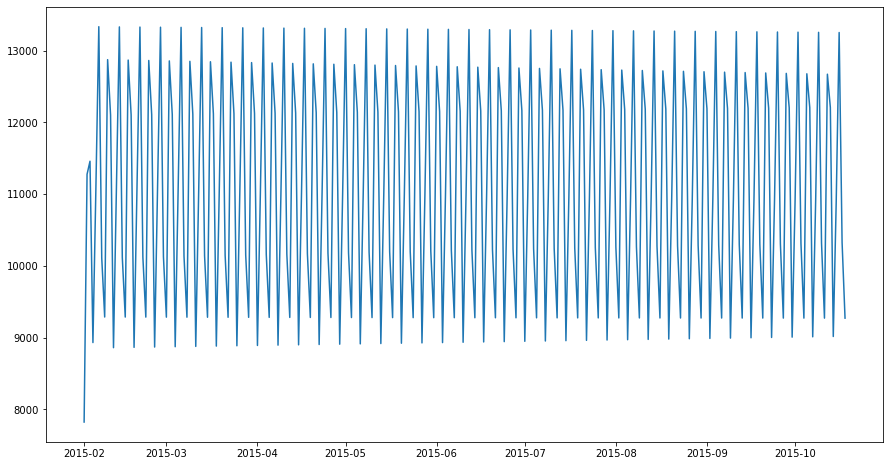

In [206]:
plt.plot(kk)

In [207]:
# acf-1,5
# pacf- 1,2,4,5

Text(0.5, 0, 'Days')

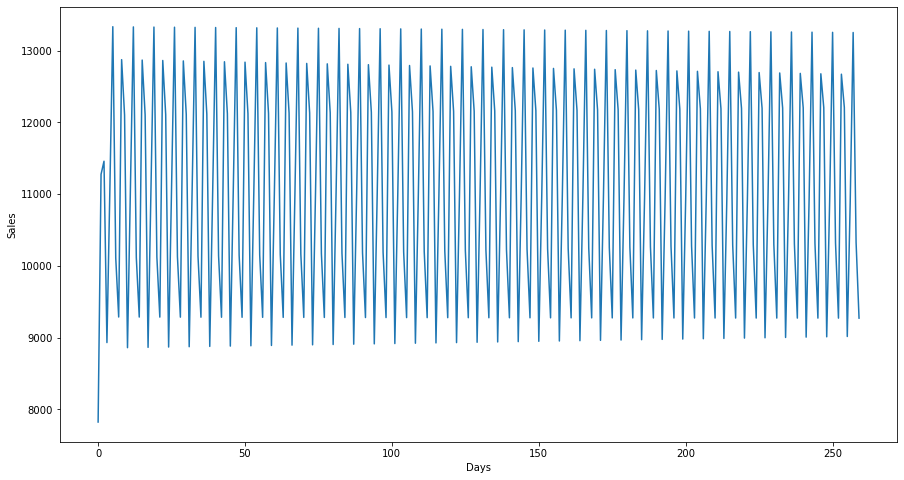

In [208]:
x=list(range(len(kk.Final_forecast.index)))
y=kk.Final_forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

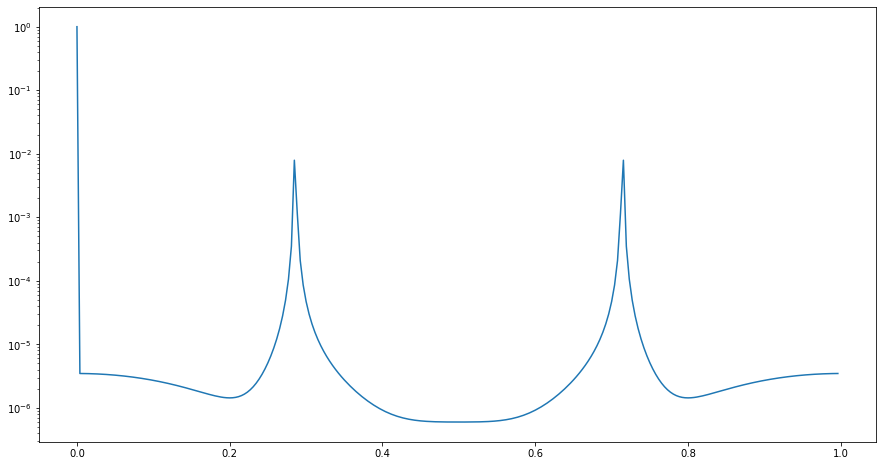

In [209]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

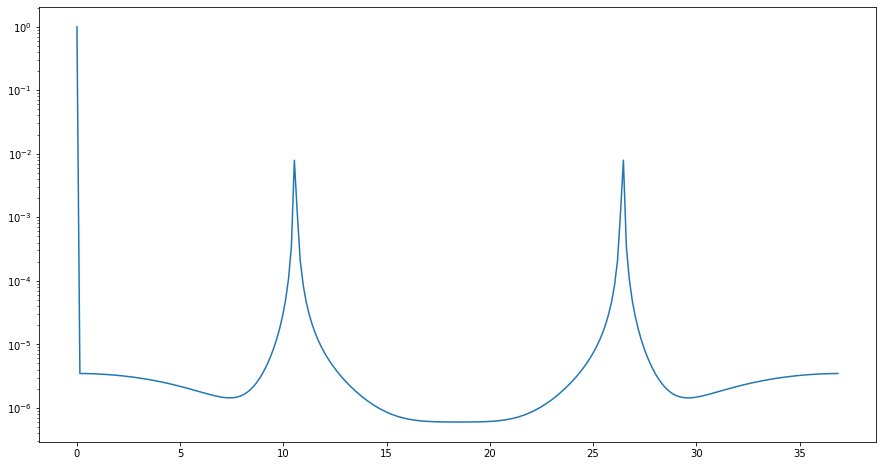

In [210]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

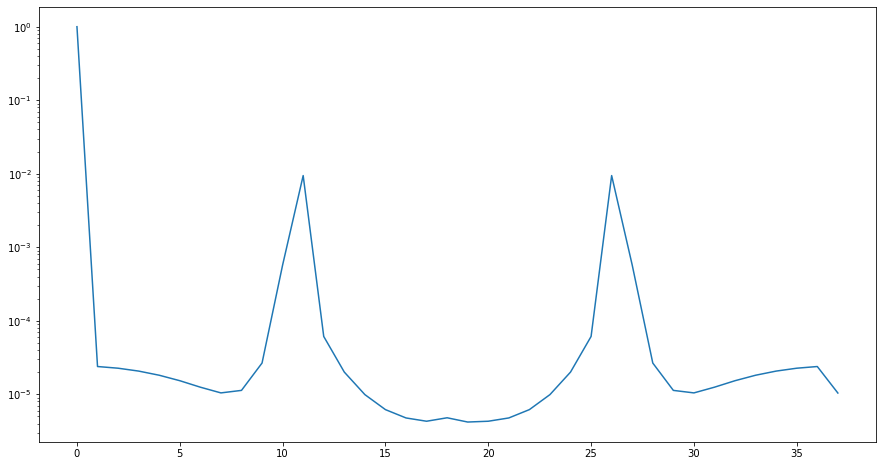

In [211]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

***SARIMA Model***

In [212]:
import itertools
p = q = range(0, 6)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(0, 0, 4, 7)


In [213]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [214]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:1101.4973793688628
SARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:580.2822065963458
SARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:62.962272310613955
SARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:-148.0635009429096
SARIMA(0, 0, 0)x(0, 0, 4, 7)12 - AIC:-300.051919043407
SARIMA(0, 0, 0)x(0, 0, 5, 7)12 - AIC:-408.7053382591091
SARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:-503.72182840565773
SARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:-1152.068830689701
SARIMA(0, 0, 0)x(1, 0, 2, 7)12 - AIC:-1171.377336398409
SARIMA(0, 0, 0)x(1, 0, 3, 7)12 - AIC:-1224.3354072006127
SARIMA(0, 0, 0)x(1, 0, 4, 7)12 - AIC:-1223.2831829936536
SARIMA(0, 0, 0)x(1, 0, 5, 7)12 - AIC:-1214.8506168169783
SARIMA(0, 0, 0)x(2, 0, 0, 7)12 - AIC:-1101.7334861607187
SARIMA(0, 0, 0)x(2, 0, 1, 7)12 - AIC:-1214.4536488384624
SARIMA(0, 0, 0)x(2, 0, 2, 7)12 - AIC:-1262.0017948354184
SARIMA(0, 0, 0)x(2, 0, 3, 7)12 - AIC:-1258.7499483053584
SARIMA(0, 0, 0)x(2, 0, 4, 7)12 - AIC:-1247.3199267128416
SARIMA(0, 0, 0)x(2, 0, 5, 7)12 - AIC:-122

In [216]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
770  (3, 0, 3)  (2, 0, 2, 7) -1649.367624
302  (1, 0, 2)  (2, 0, 2, 7) -1648.468358
338  (1, 0, 3)  (2, 0, 2, 7) -1647.852275
446  (2, 0, 0)  (2, 0, 2, 7) -1646.585551
734  (3, 0, 2)  (2, 0, 2, 7) -1645.598835
..         ...           ...          ...
959  (4, 0, 2)  (3, 0, 5, 7)  3708.453178
947  (4, 0, 2)  (1, 0, 5, 7)  3714.286638
961  (4, 0, 2)  (4, 0, 1, 7)  3718.334696
958  (4, 0, 2)  (3, 0, 4, 7)  3741.357059
946  (4, 0, 2)  (1, 0, 4, 7)  3753.690267

[1296 rows x 3 columns]

In [217]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(3,0,3),
                                seasonal_order=(2,0,2,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                  Sales   No. Observations:                  761
Model:             SARIMAX(3, 0, 3)x(2, 0, [1, 2], 7)   Log Likelihood                 835.684
Date:                                Mon, 21 Mar 2022   AIC                          -1649.368
Time:                                        22:35:30   BIC                          -1598.650
Sample:                                    01-01-2013   HQIC                         -1629.816
                                         - 01-31-2015                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1955      0.208      5.760      0.000       0.789       1.602
ar.

In [218]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

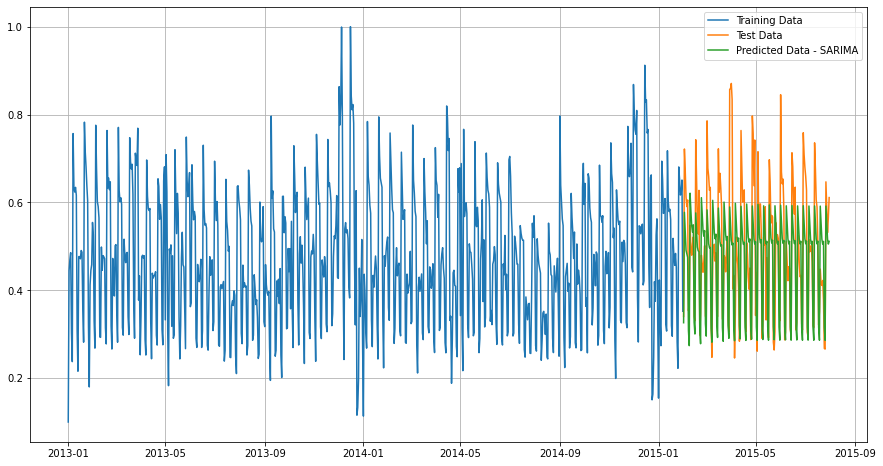

In [219]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

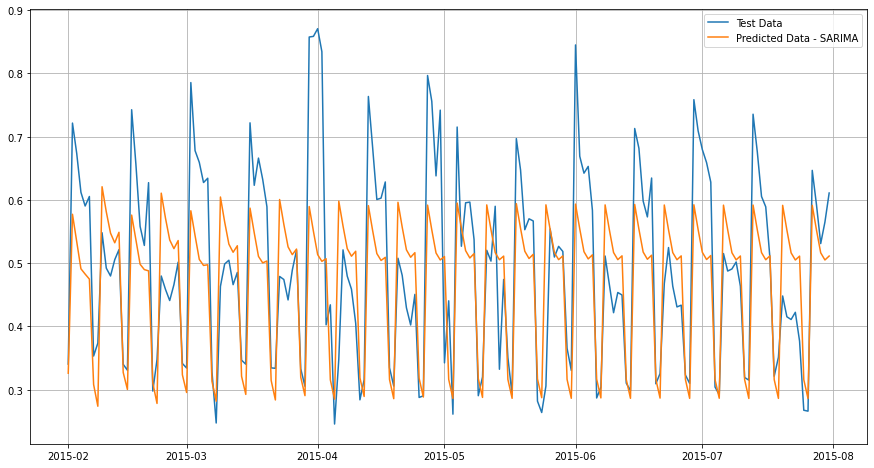

In [220]:
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [221]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sales'],SARIMA_predictions, squared=False)
print(rmse)

0.10601801461292587


In [222]:
mape = MAPE(test['Sales'],SARIMA_predictions)
print(mape)

15.735460380533597


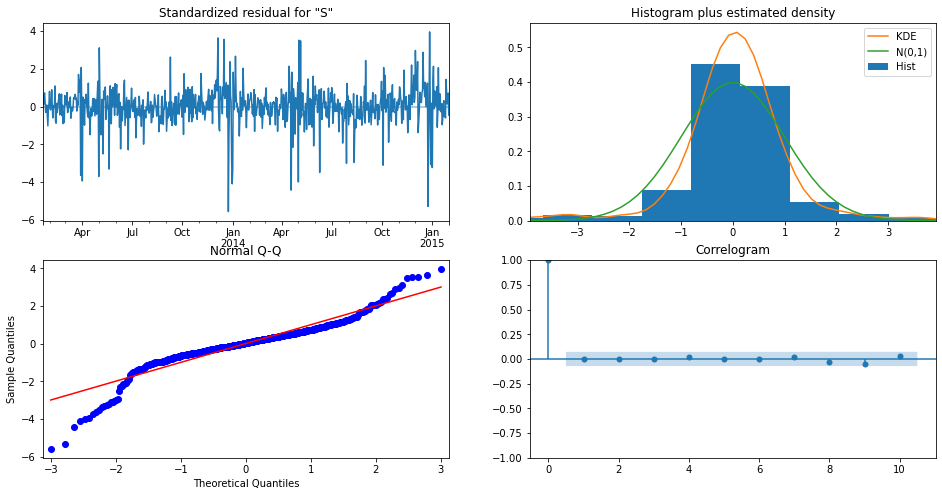

In [223]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [224]:
final_pred4=model_Sarima.forecast(260)

In [225]:
fv4=final_pred[0]
fv4

array([0.31430008, 0.48080882, 0.4895647 , 0.3677055 , 0.47075689,
       0.57998064, 0.42452145, 0.38487701, 0.55783274, 0.52062169,
       0.36426871, 0.47093379, 0.57983094, 0.4248252 , 0.38484279,
       0.55755009, 0.5207808 , 0.36448063, 0.47068058, 0.57973161,
       0.42512244, 0.38481001, 0.55726753, 0.52093911, 0.36469273,
       0.4704281 , 0.57963178, 0.42541918, 0.38477796, 0.55698515,
       0.52109661, 0.36490502, 0.47017634, 0.57953143, 0.42571542,
       0.38474664, 0.55670295, 0.5212533 , 0.36511749, 0.46992531,
       0.57943059, 0.42601115, 0.38471605, 0.55642093, 0.52140918,
       0.36533013, 0.46967501, 0.57932924, 0.42630638, 0.38468619,
       0.55613909, 0.52156426, 0.36554296, 0.46942544, 0.57922739,
       0.4266011 , 0.38465705, 0.55585743, 0.52171853, 0.36575595,
       0.46917659, 0.57912504, 0.42689532, 0.38462863, 0.55557596,
       0.521872  , 0.36596912, 0.46892847, 0.5790222 , 0.42718904,
       0.38460093, 0.55529467, 0.52202466, 0.36618247, 0.46868

In [226]:
len(fv4)

260

In [227]:
final_value44=scaler.inverse_transform([fv4])
final_value44

array([[ 7822.20290752, 11277.62935114, 11459.33331236,  8930.48395064,
        11069.02938524, 13335.66485726, 10109.54123497,  9286.83100152,
        12876.04670623, 12103.83488337,  8859.16291303, 11072.70046877,
        13332.55836581, 10115.84473144,  9286.12083071, 12870.18112908,
        12107.13674626,  8863.560729  , 11067.44576028, 13330.49707596,
        10122.01315169,  9285.44059709, 12864.31744981, 12110.42199025,
         8867.96236095, 11062.20616576, 13328.42523311, 10128.17115565,
         9284.77553991, 12858.4574396 , 12113.69043375,  8872.36778994,
        11056.98167784, 13326.34288276, 10134.31872773,  9284.12562095,
        12852.60113098, 12116.94210055,  8876.77697289, 11051.77229189,
        13324.25007003, 10140.45585252,  9283.49080194, 12846.74855637,
        12120.17701448,  8881.18986681, 11046.57800318, 13322.14683999,
        10146.5825147 ,  9282.87104463, 12840.89974805, 12123.39519943,
         8885.60642881, 11041.3988069 , 13320.03323767, 10152.69

In [228]:
date4 = pd.date_range(start='2015/02/01', periods=260, freq='D')
date4

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [229]:
ff44=pd.DataFrame(final_value44.reshape(-1,1), columns=['Forecast'])

In [230]:
ff44

Forecast
0     7822.202908
1    11277.629351
2    11459.333312
3     8930.483951
4    11069.029385
..            ...
255   9015.092953
256  10897.742230
257  13254.427282
258  10325.446223
259   9271.092284

[260 rows x 1 columns]

In [231]:
ff44['Time_stamp']= date4

In [232]:
ff44

Forecast Time_stamp
0     7822.202908 2015-02-01
1    11277.629351 2015-02-02
2    11459.333312 2015-02-03
3     8930.483951 2015-02-04
4    11069.029385 2015-02-05
..            ...        ...
255   9015.092953 2015-10-14
256  10897.742230 2015-10-15
257  13254.427282 2015-10-16
258  10325.446223 2015-10-17
259   9271.092284 2015-10-18

[260 rows x 2 columns]

In [233]:
ff44=ff44.set_index('Time_stamp')

In [234]:
ff44

Forecast
Time_stamp              
2015-02-01   7822.202908
2015-02-02  11277.629351
2015-02-03  11459.333312
2015-02-04   8930.483951
2015-02-05  11069.029385
...                  ...
2015-10-14   9015.092953
2015-10-15  10897.742230
2015-10-16  13254.427282
2015-10-17  10325.446223
2015-10-18   9271.092284

[260 rows x 1 columns]

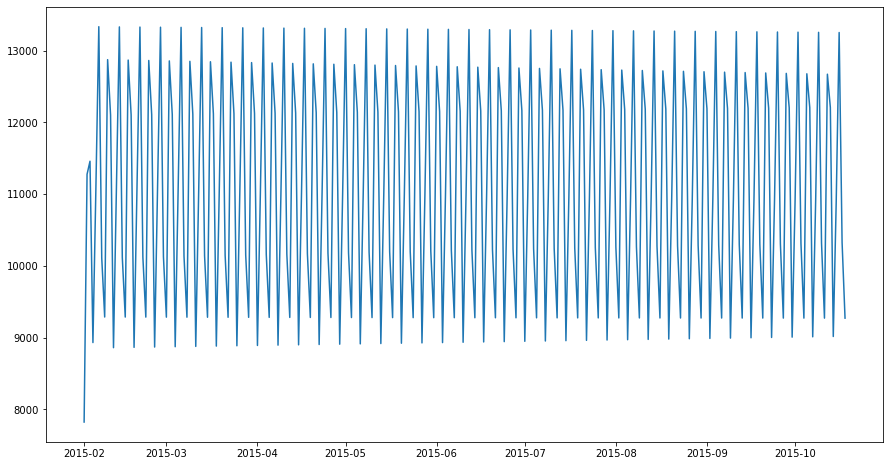

In [235]:
plt.plot(ff44)

Text(0.5, 0, 'Days')

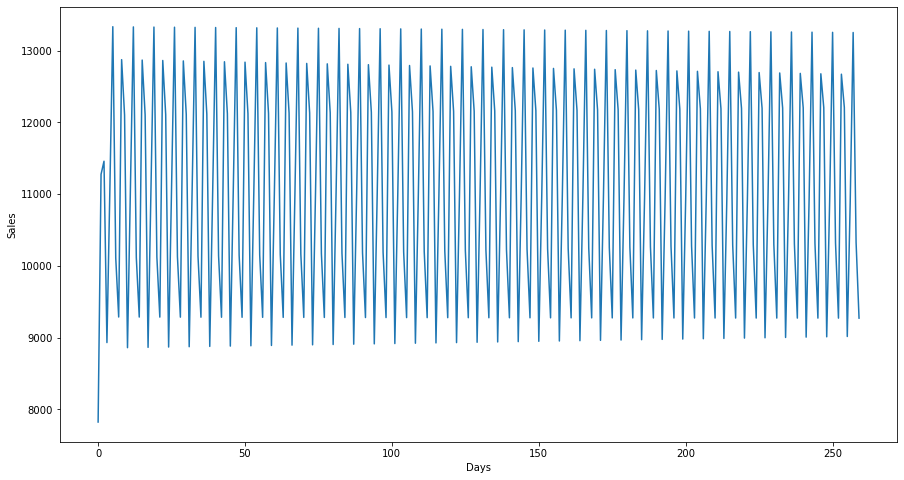

In [236]:
x=list(range(len(ff44.Forecast.index)))
y=ff44.Forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

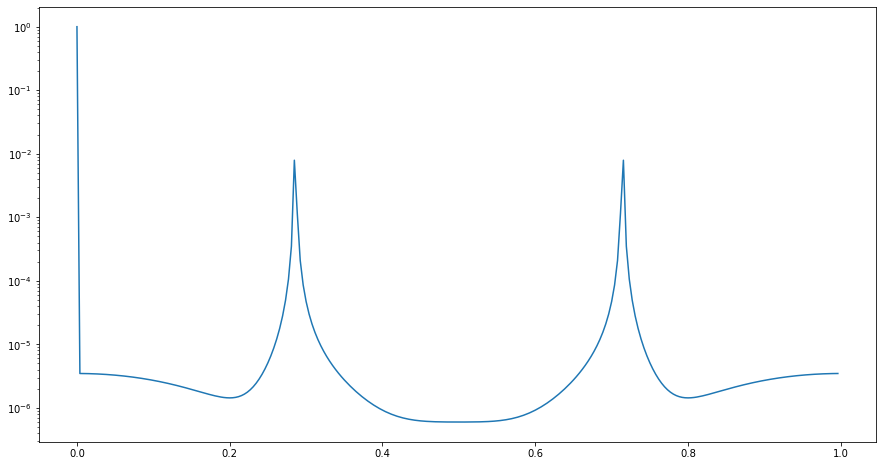

In [237]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

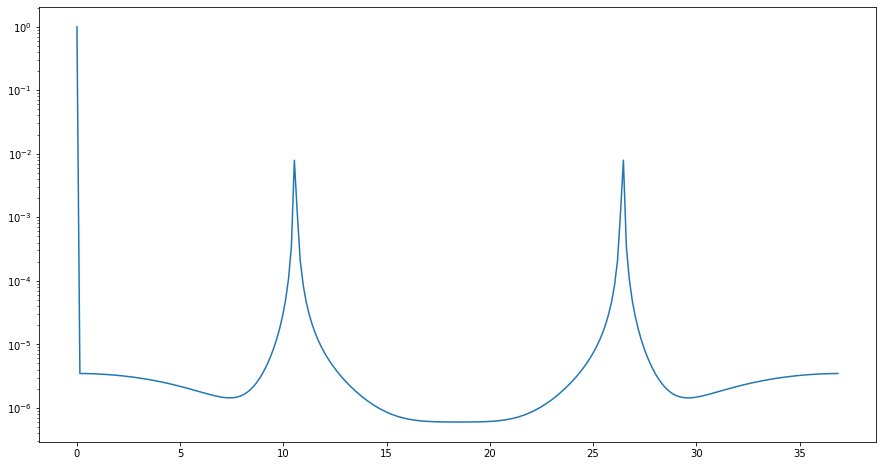

In [238]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

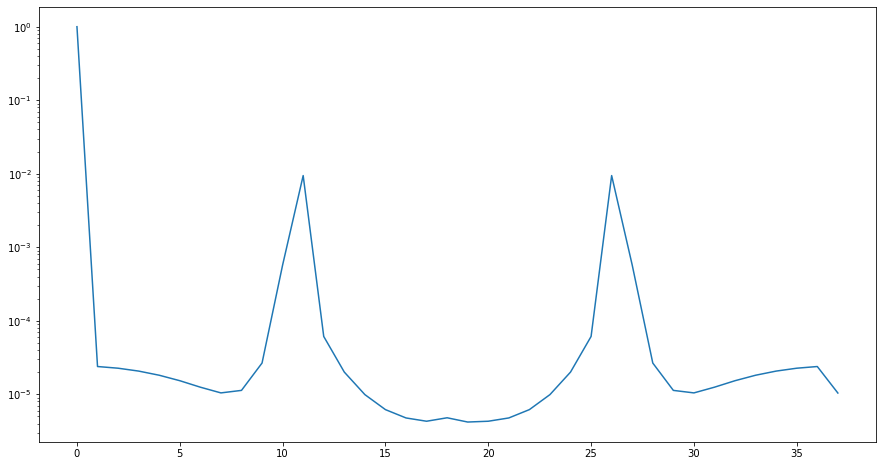

In [239]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)